In [53]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
dataset = pd.read_csv('train.csv')

dataset_test = pd.read_csv('test.csv')
ID = dataset_test['id']
dataset_test.drop('id', axis=1, inplace=True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [54]:
print(dataset.head(5))

   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12 cat13  \
0   1    A    B    A    B    A    A    A    A    B     A     B     A     A   
1   2    A    B    A    A    A    A    A    A    B     B     A     A     A   
2   5    A    B    A    A    B    A    A    A    B     B     B     B     B   
3  10    B    B    A    B    A    A    A    A    B     A     A     A     A   
4  11    A    B    A    B    A    A    A    A    B     B     A     B     A   

  cat14 cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23 cat24 cat25  \
0     A     A     A     A     A     A     A     A     A     B     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     B     A     A   
4     A     A     A     A     A     A     A     A     A     B     A     A   

  cat26 cat27 cat28 cat29 cat30 cat31 cat32 cat33 cat34 cat35 cat36 

In [55]:
print (dataset.shape)

(188318, 132)


In [56]:
dataset = dataset.iloc[:,1:]

In [57]:
print(dataset.describe())

               cont1          cont2          cont3          cont4  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.493861       0.507188       0.498918       0.491812   
std         0.187640       0.207202       0.202105       0.211292   
min         0.000016       0.001149       0.002634       0.176921   
25%         0.346090       0.358319       0.336963       0.327354   
50%         0.475784       0.555782       0.527991       0.452887   
75%         0.623912       0.681761       0.634224       0.652072   
max         0.984975       0.862654       0.944251       0.954297   

               cont5          cont6          cont7          cont8  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.487428       0.490945       0.484970       0.486437   
std         0.209027       0.205273       0.178450       0.199370   
min         0.281143       0.012683       0.069503       0.236880   
25%         0.281143       0.3361

In [58]:
print(dataset.skew())

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64


In [59]:
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
split = 116
size = 15

data = dataset.iloc[:,split:]

In [61]:
data.head()

cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
0  0.726300  0.245921  0.187583  0.789639  0.310061  0.718367  0.335060   
1  0.330514  0.737068  0.592681  0.614134  0.885834  0.438917  0.436585   
2  0.261841  0.358319  0.484196  0.236924  0.397069  0.289648  0.315545   
3  0.321594  0.555782  0.527991  0.373816  0.422268  0.440945  0.391128   
4  0.273204  0.159990  0.527991  0.473202  0.704268  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85

In [62]:
cols=data.columns

In [63]:
n_cols = 2
n_rows = 7

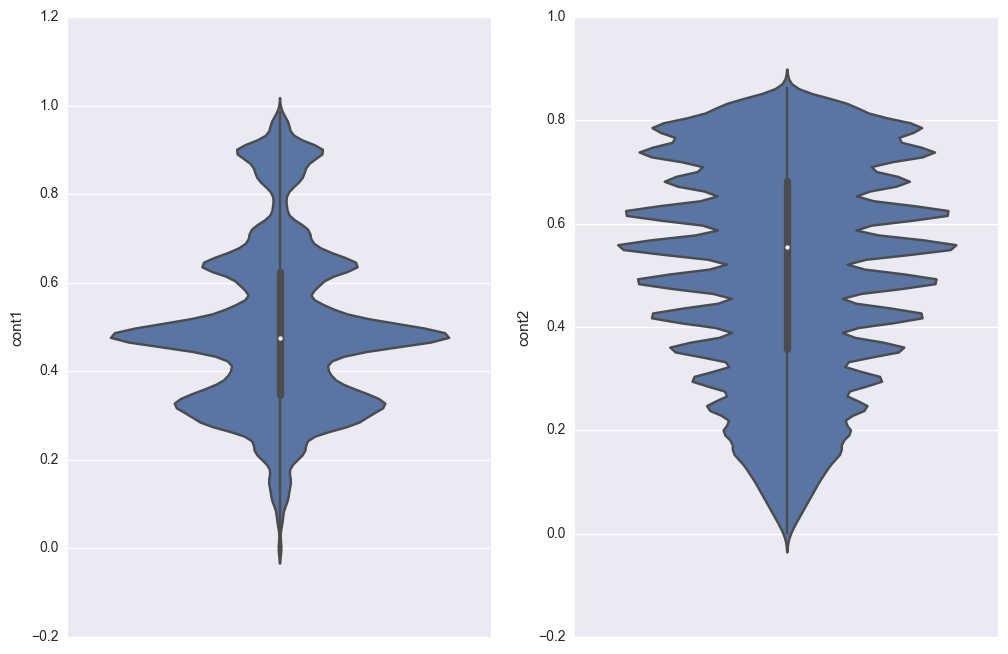

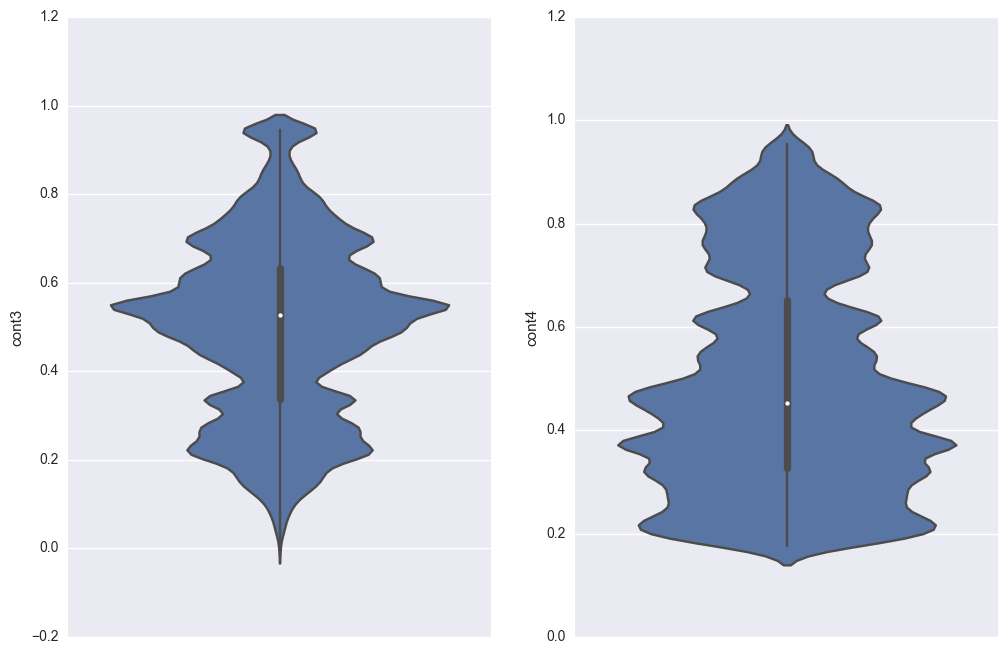

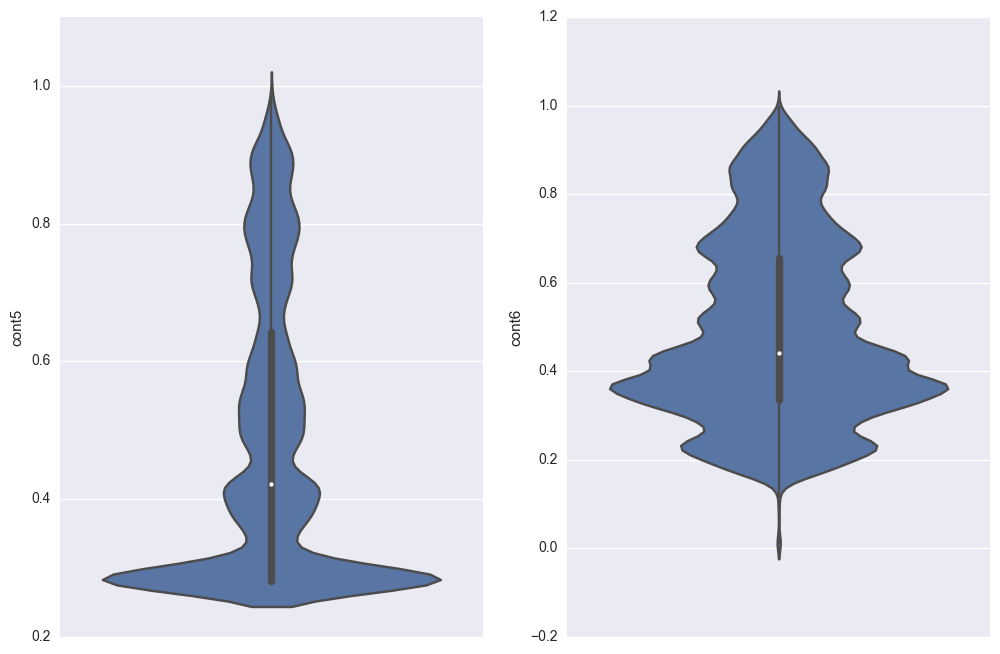

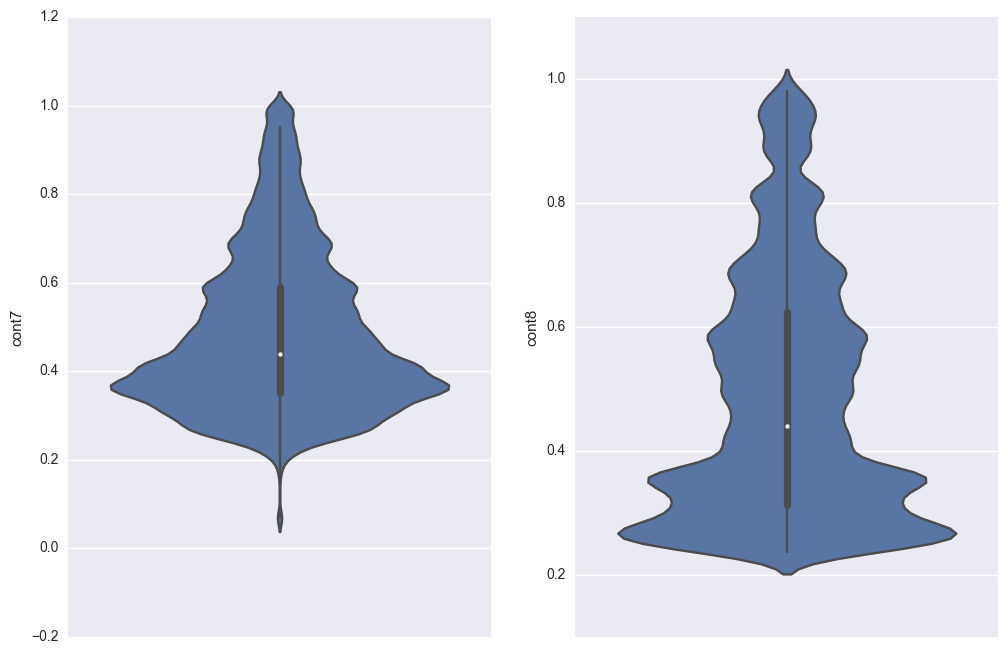

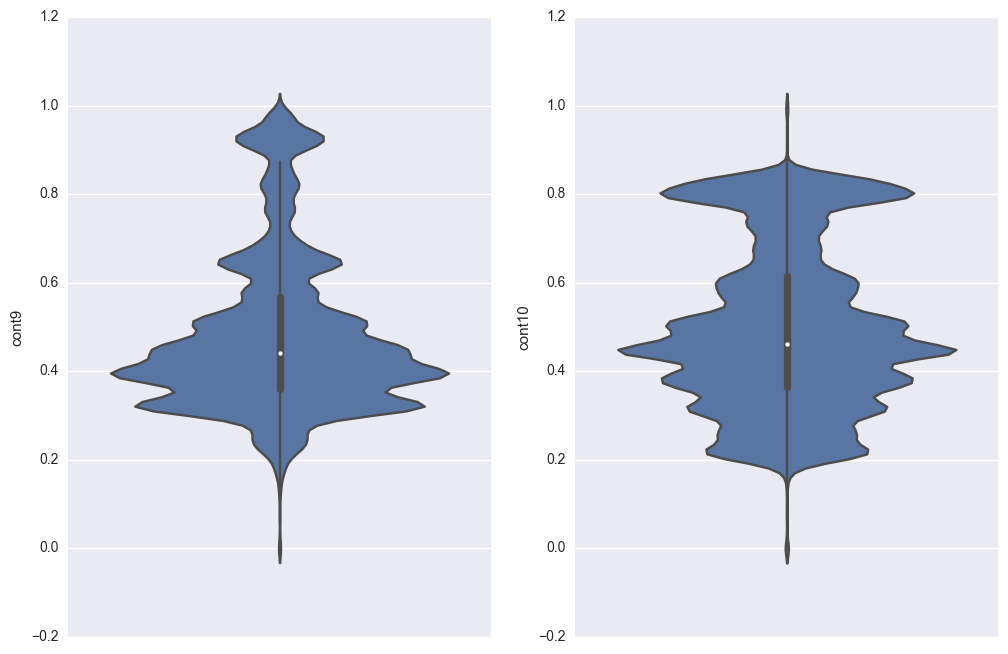

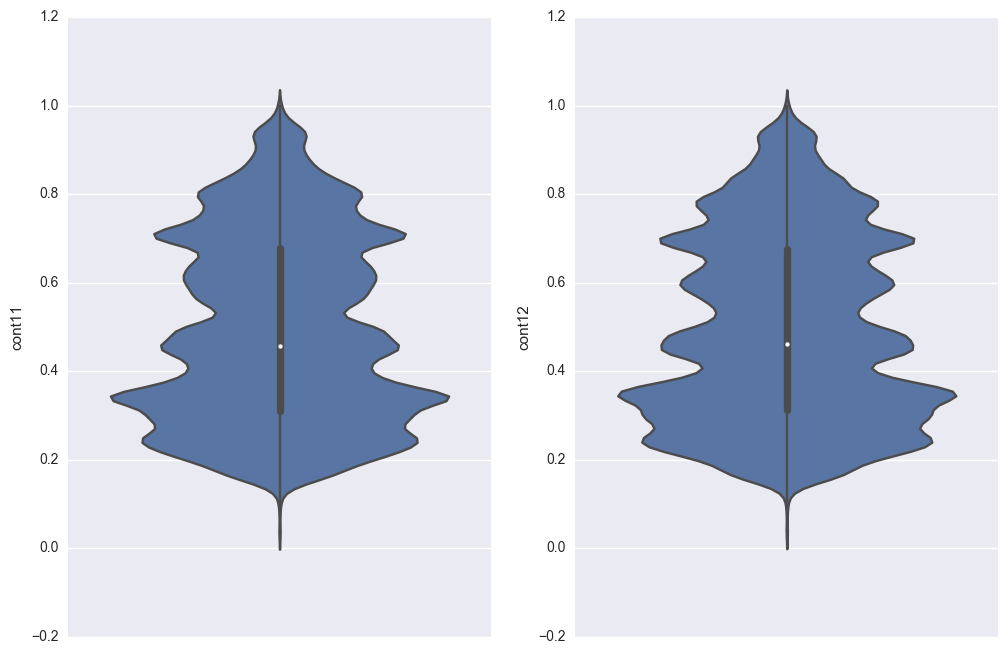

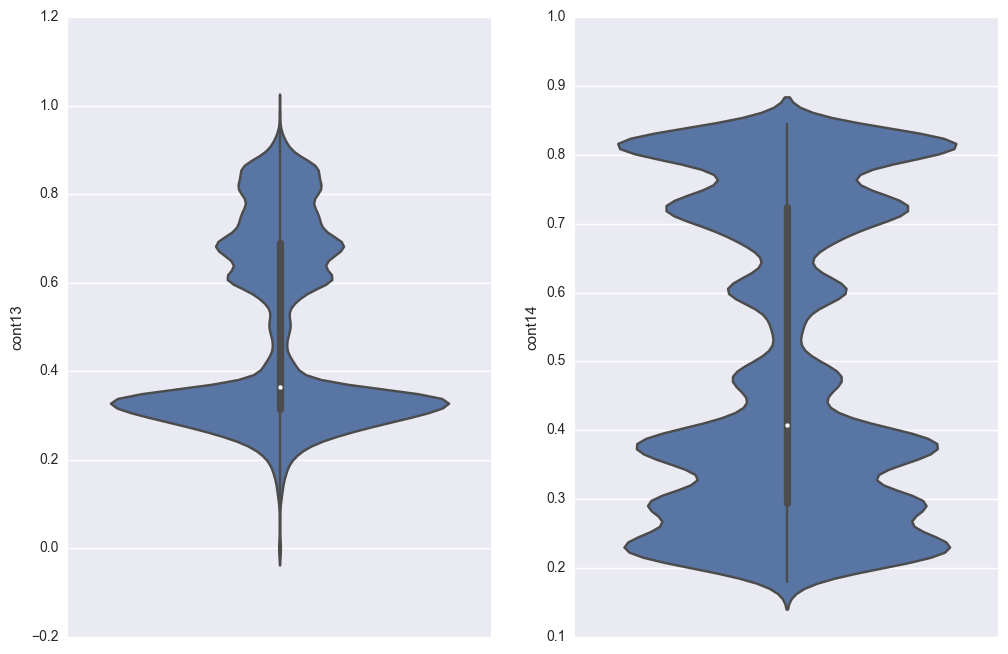

In [64]:
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=dataset, ax=ax[j])

In [81]:
dataset['loss'] = numpy.log1p(dataset['loss'])

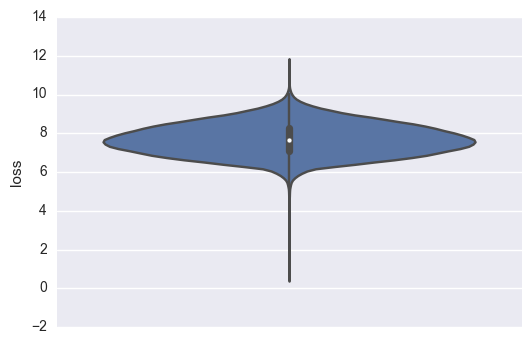

In [82]:
sns.violinplot(data=dataset, y='loss')
plt.show()

In [98]:
data_corr = data.corr()
threshold = 0.5
corr_list=[]

for i in range(0, size): # Size = 15 for the features
    for j in range(i+1, size): # so [i,j] = [0,1],[0,2]...[0,14]. [1,1],[1,2]...[1,14]... ...[14,14]
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1)\
           or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold): # if coord is between 0.5 and 1 (i.e.poss corr) or -0.5 and 0 (i.e. neg corr.)
                corr_list.append([data_corr.iloc[i,j],i,j]) # stores corr and corr index
                
s_corr_list = sorted(corr_list, key=lambda x: -abs(x[0]))
        

In [103]:
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont6 and cont10 = 0.88
cont6 and cont13 = 0.82
cont1 and cont10 = 0.81
cont6 and cont9 = 0.80
cont9 and cont10 = 0.79
cont6 and cont12 = 0.79
cont6 and cont11 = 0.77
cont1 and cont6 = 0.76
cont7 and cont11 = 0.75
cont7 and cont12 = 0.74
cont10 and cont12 = 0.71
cont10 and cont13 = 0.71
cont10 and cont11 = 0.70
cont6 and cont7 = 0.66
cont9 and cont13 = 0.64
cont9 and cont12 = 0.63
cont1 and cont12 = 0.61
cont9 and cont11 = 0.61
cont1 and cont11 = 0.60
cont1 and cont13 = 0.53
cont4 and cont8 = 0.53


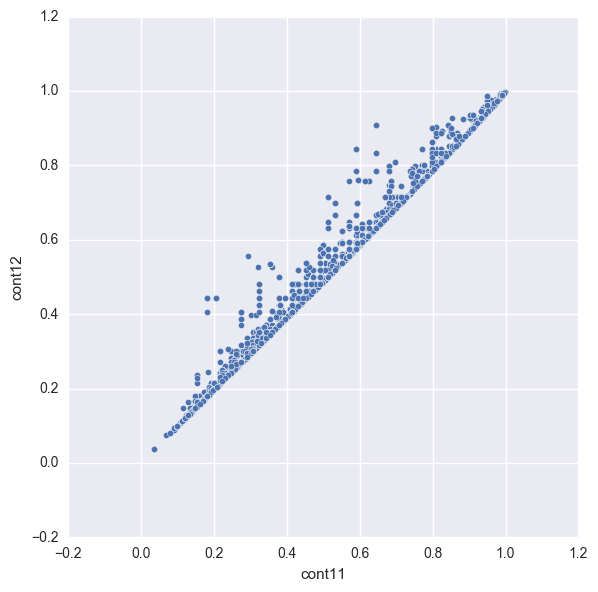

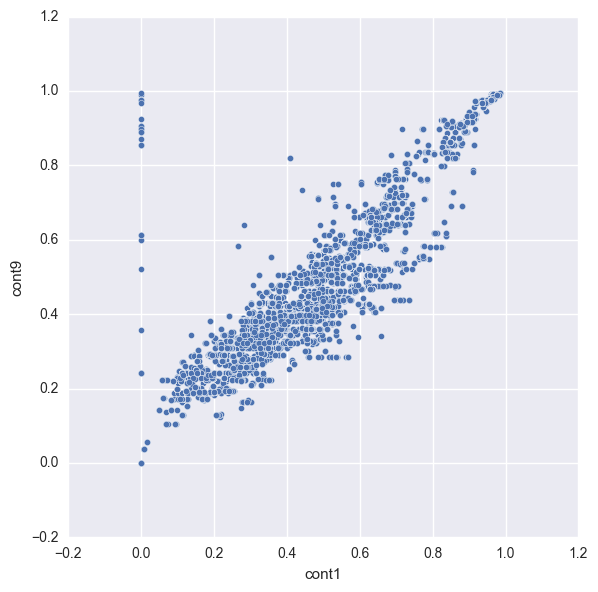

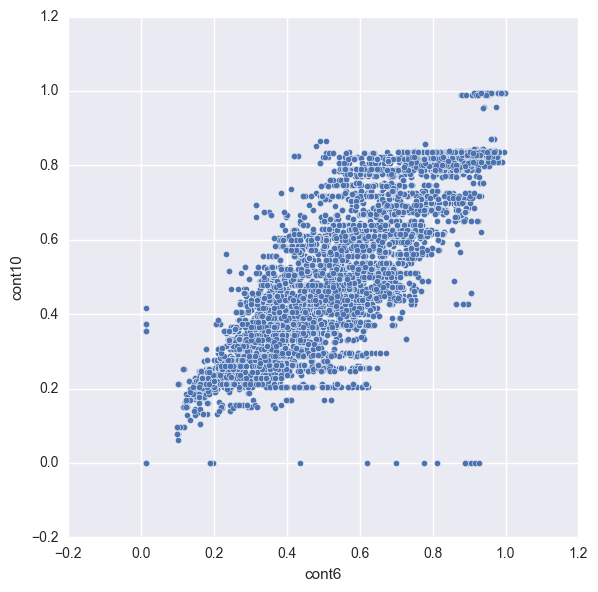

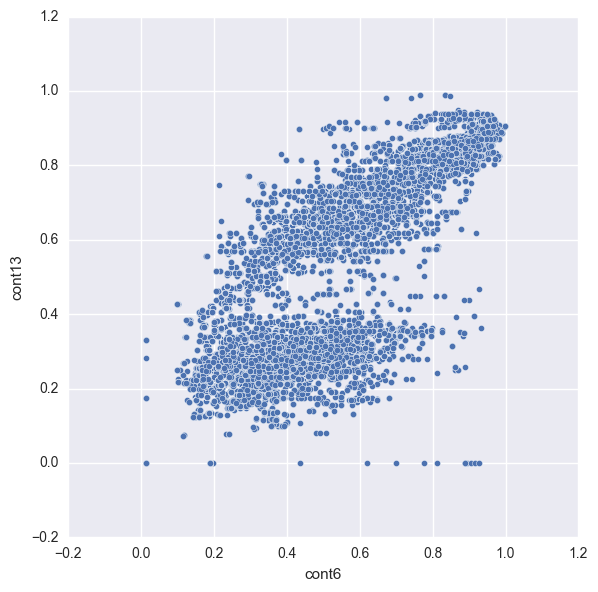

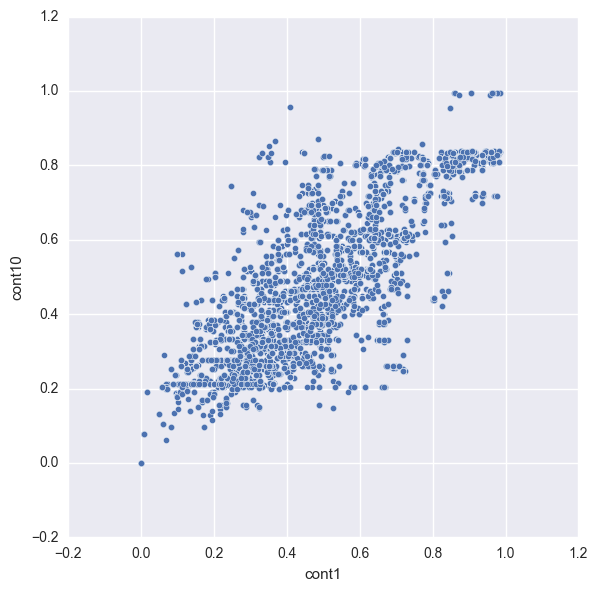

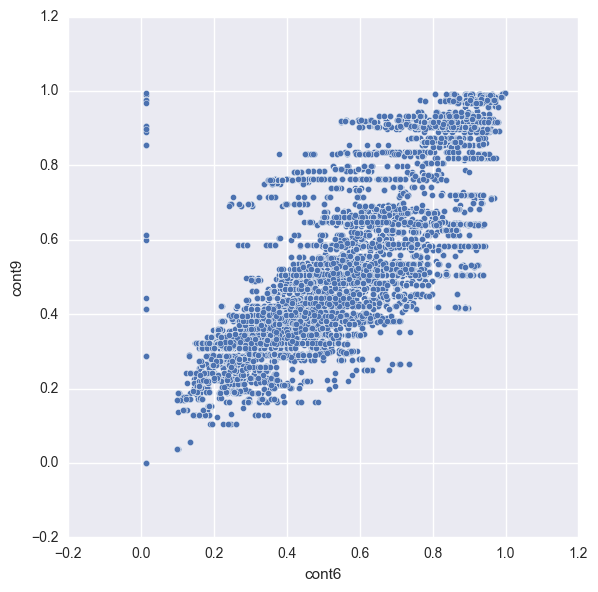

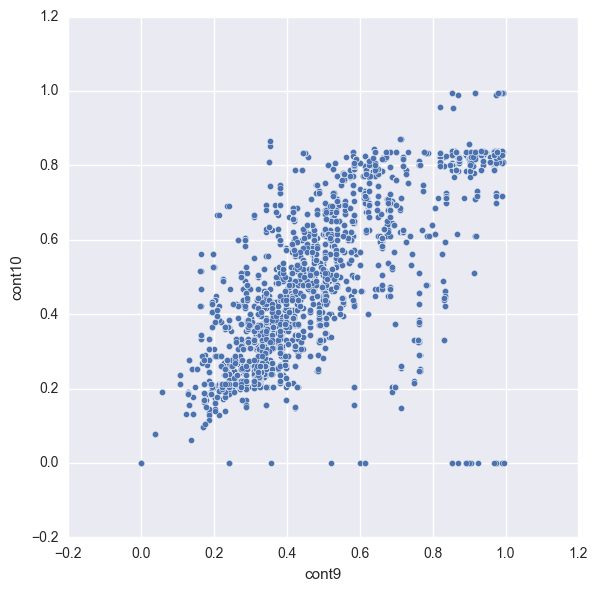

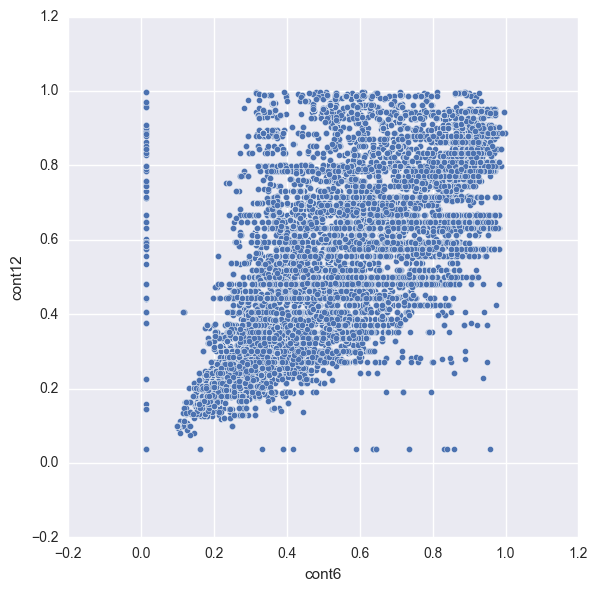

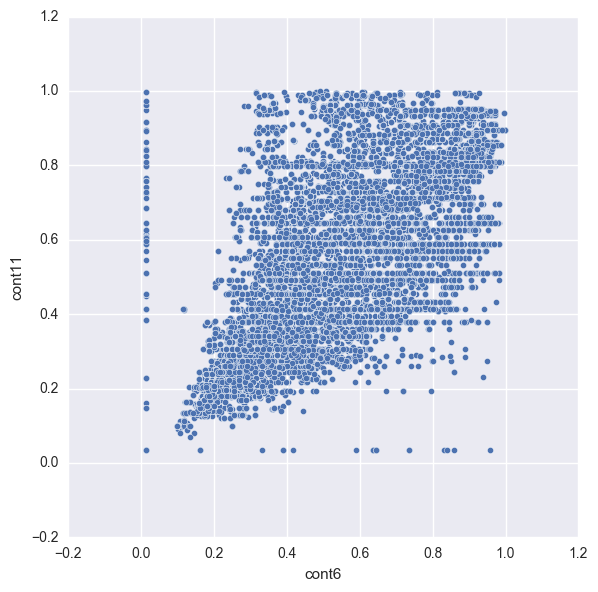

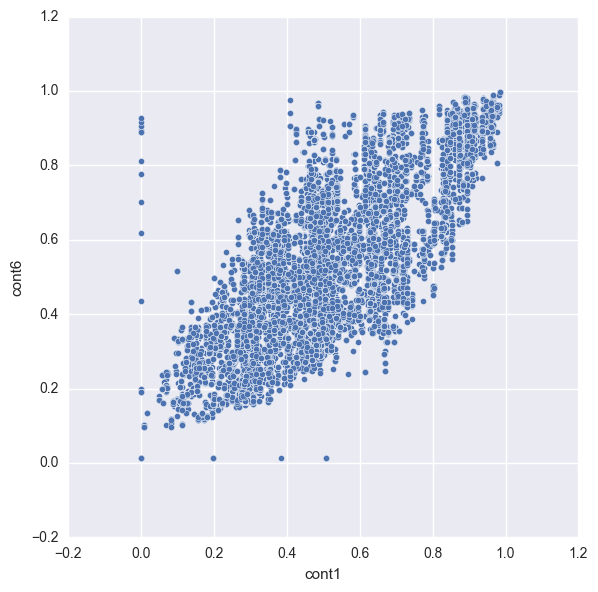

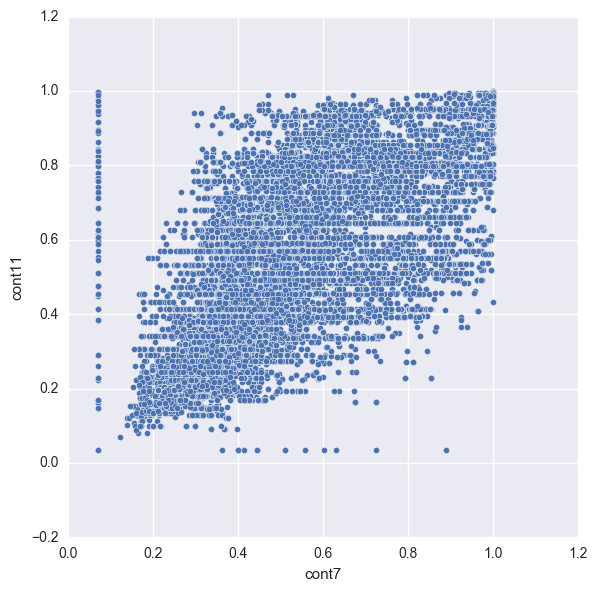

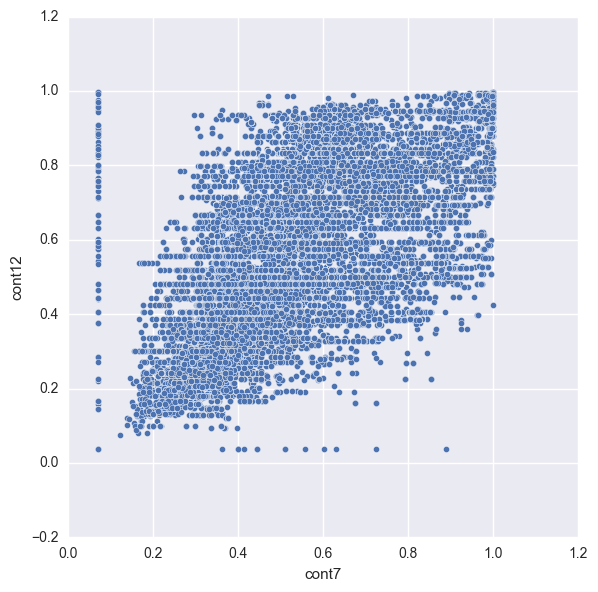

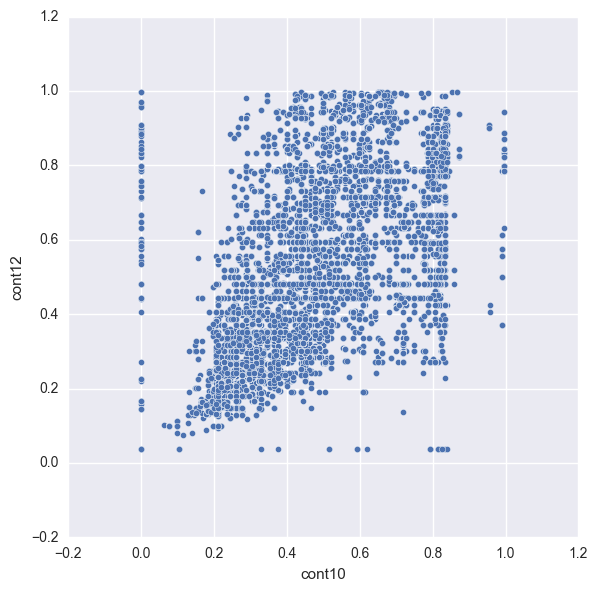

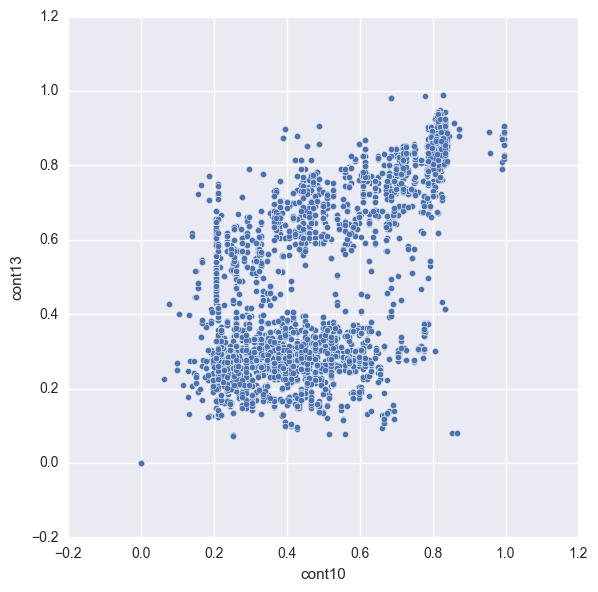

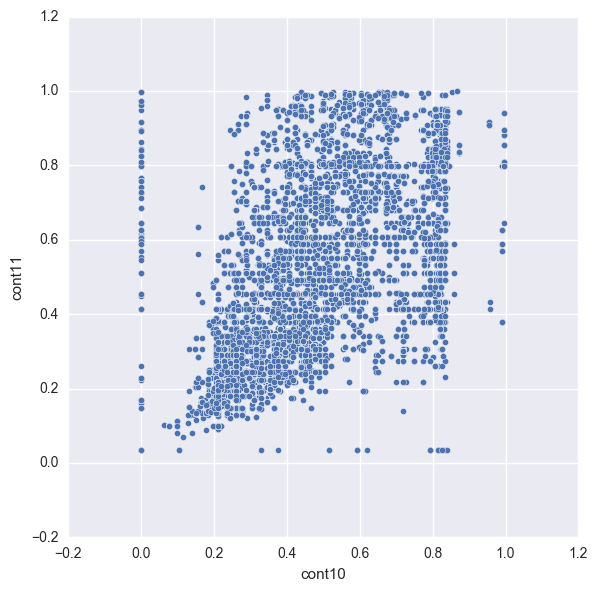

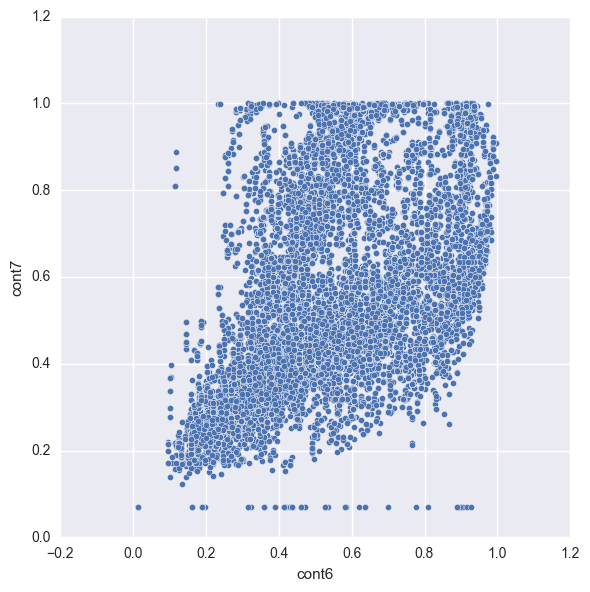

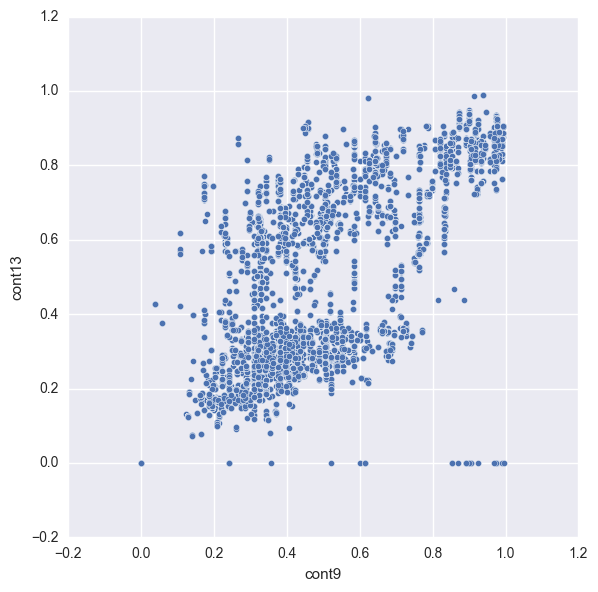

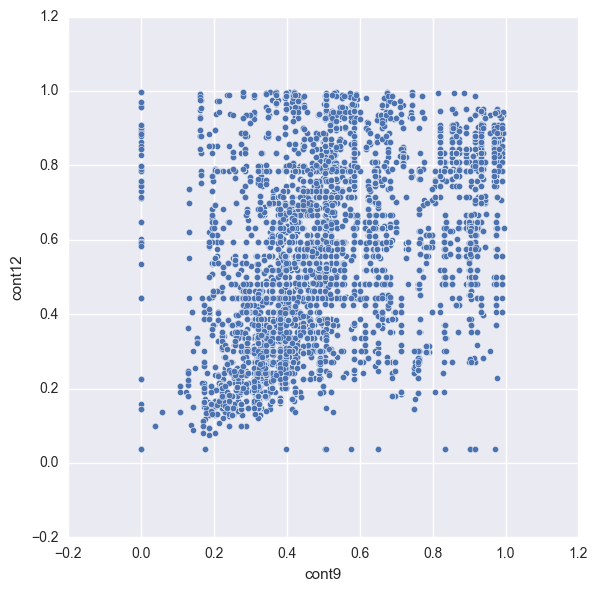

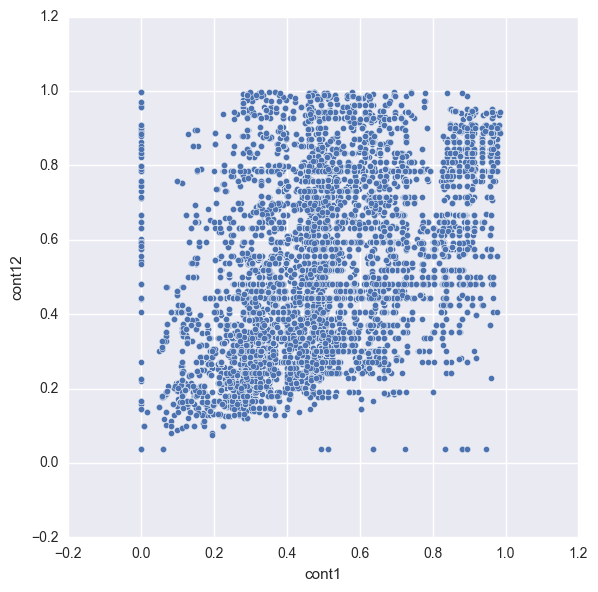

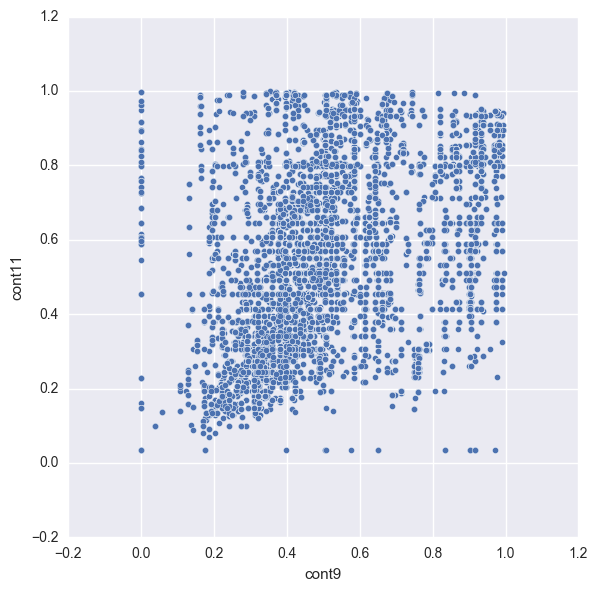

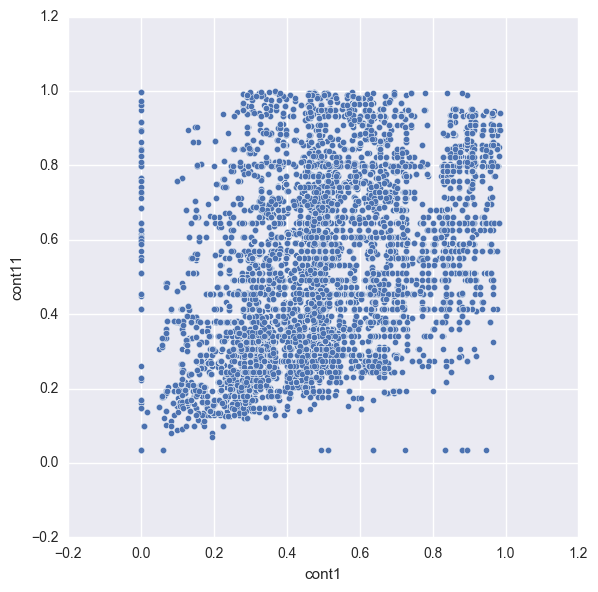

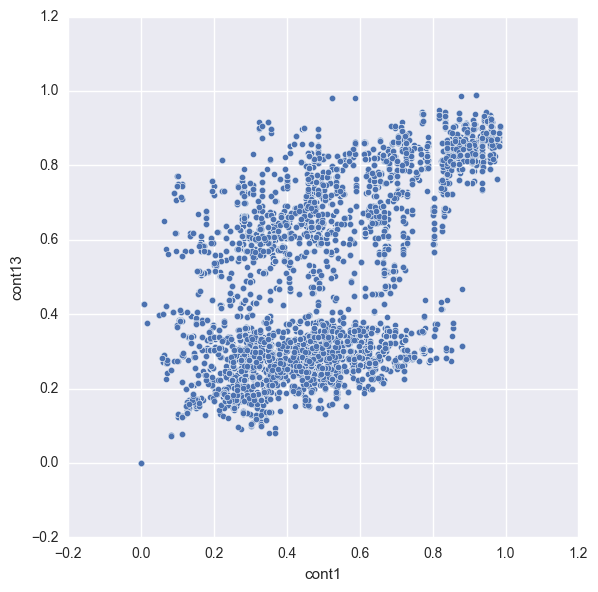

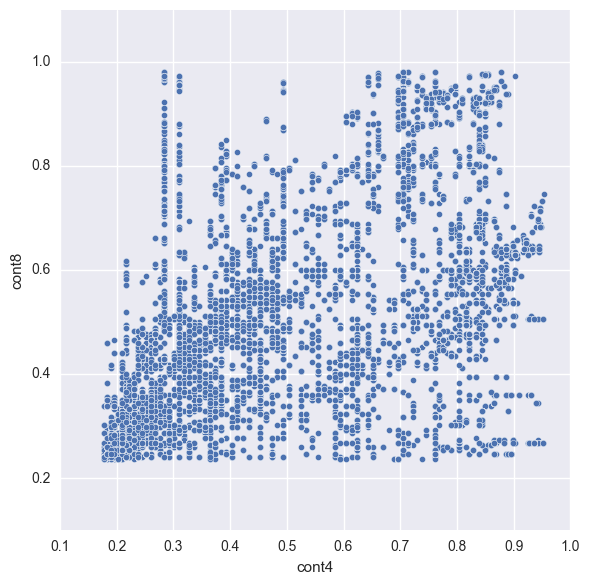

In [105]:
for v,i,j in s_corr_list:
    sns.pairplot(dataset, size=6, x_vars=cols[i], y_vars=cols[j])
    plt.show()

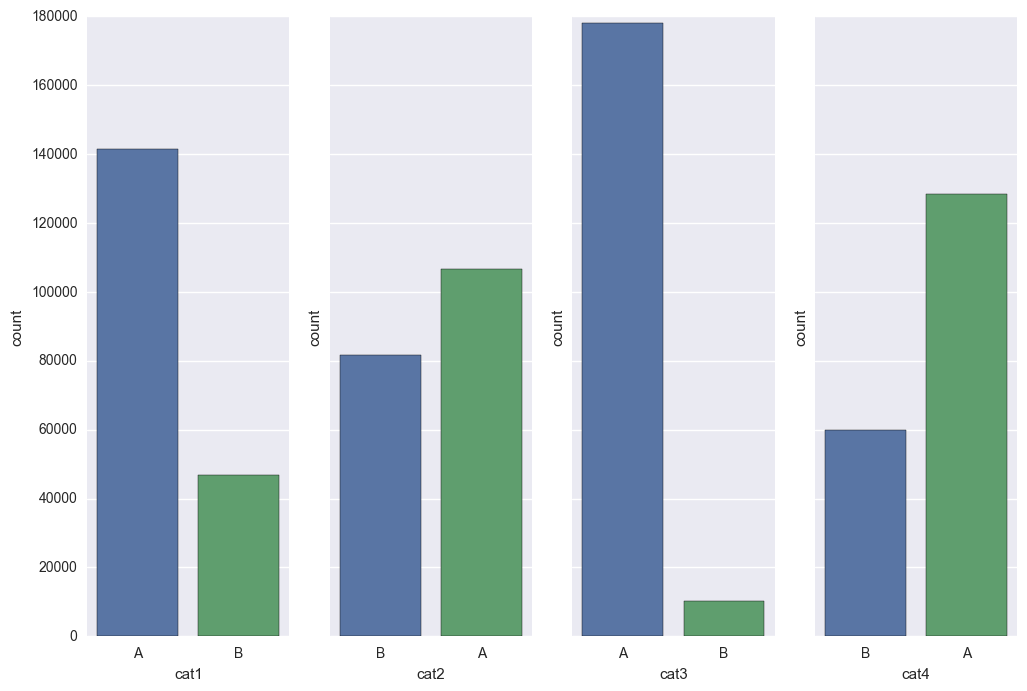

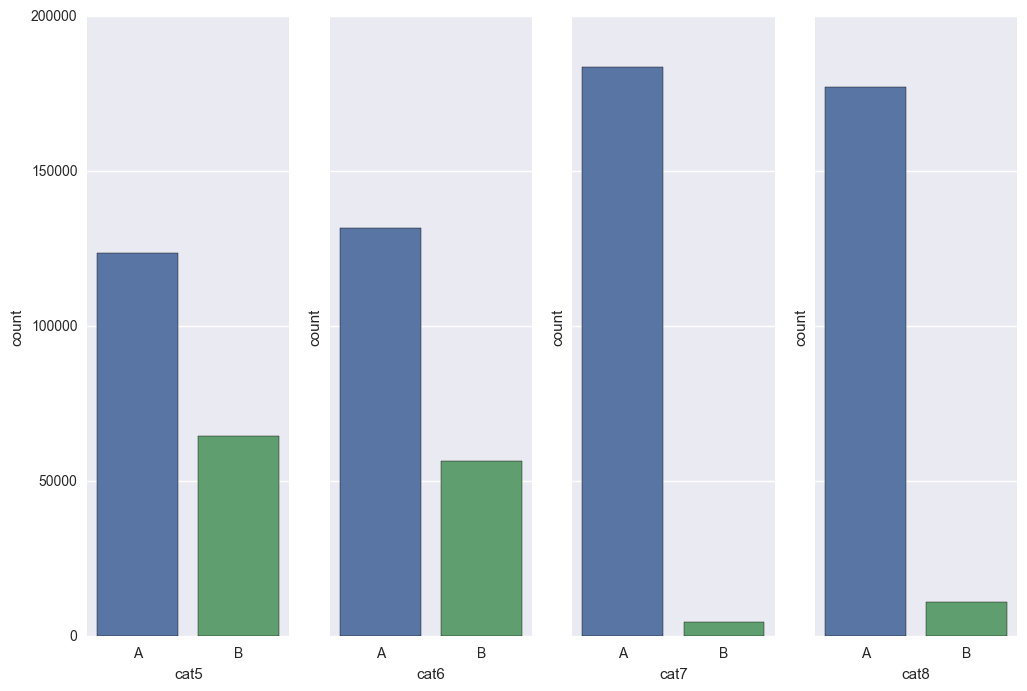

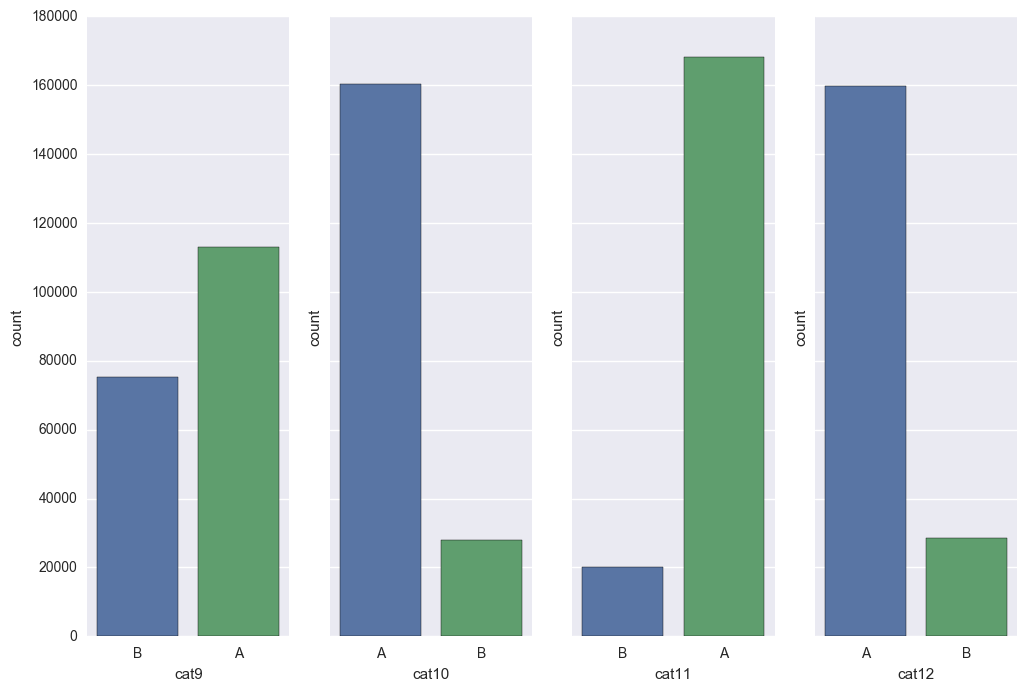

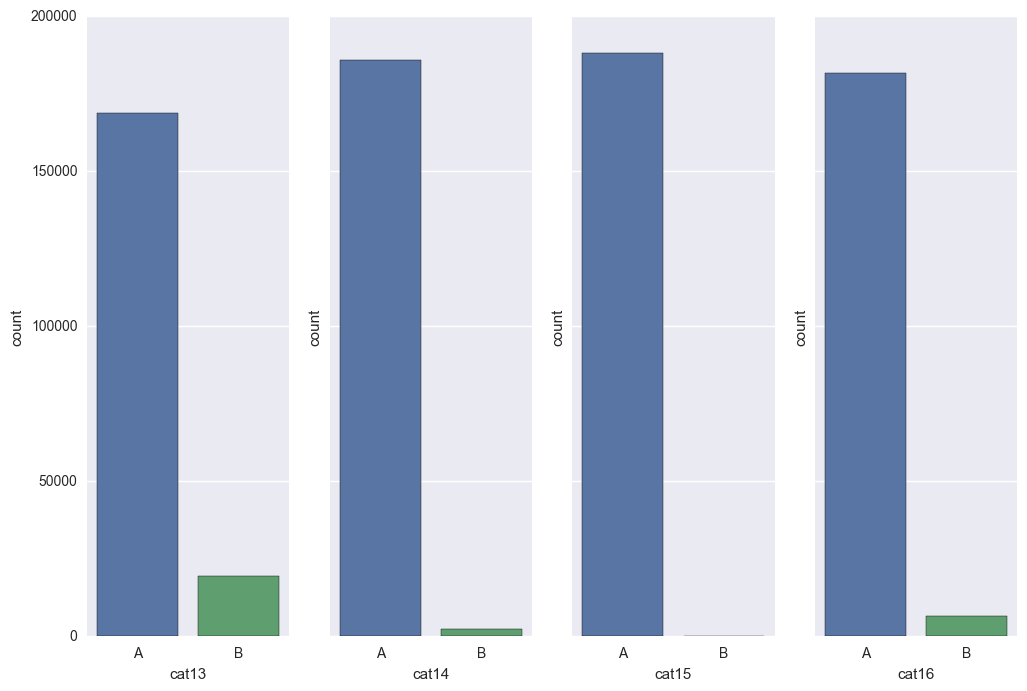

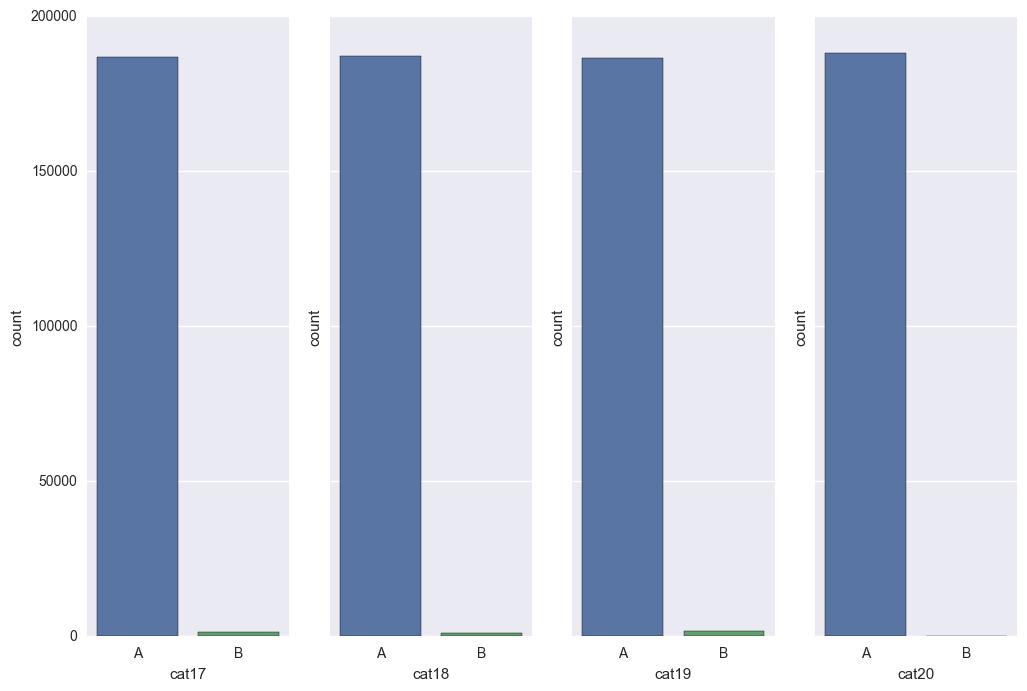

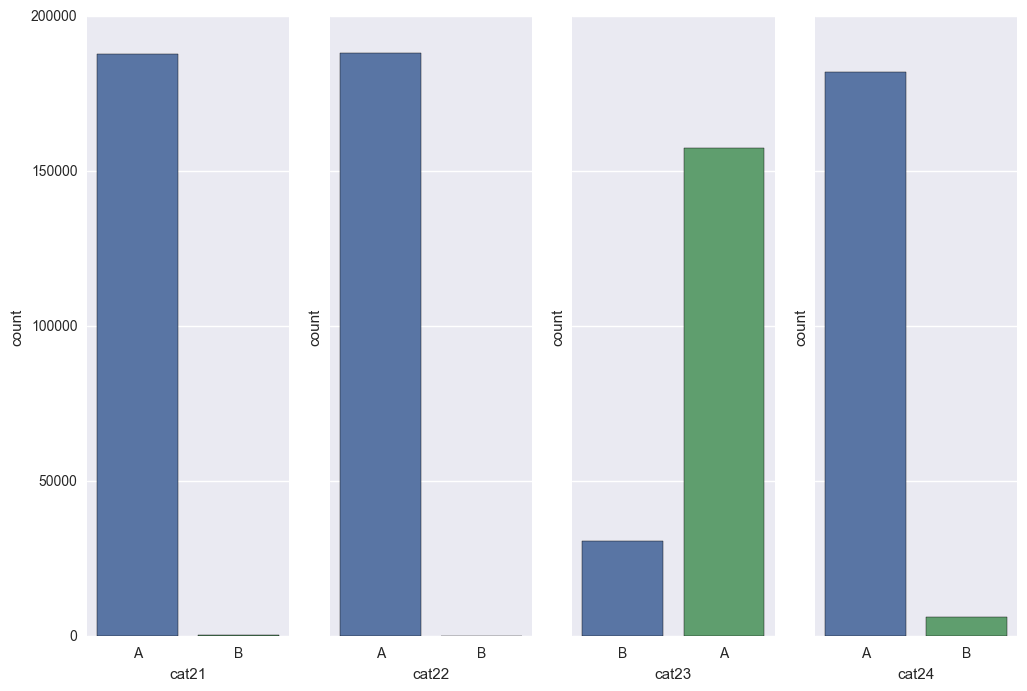

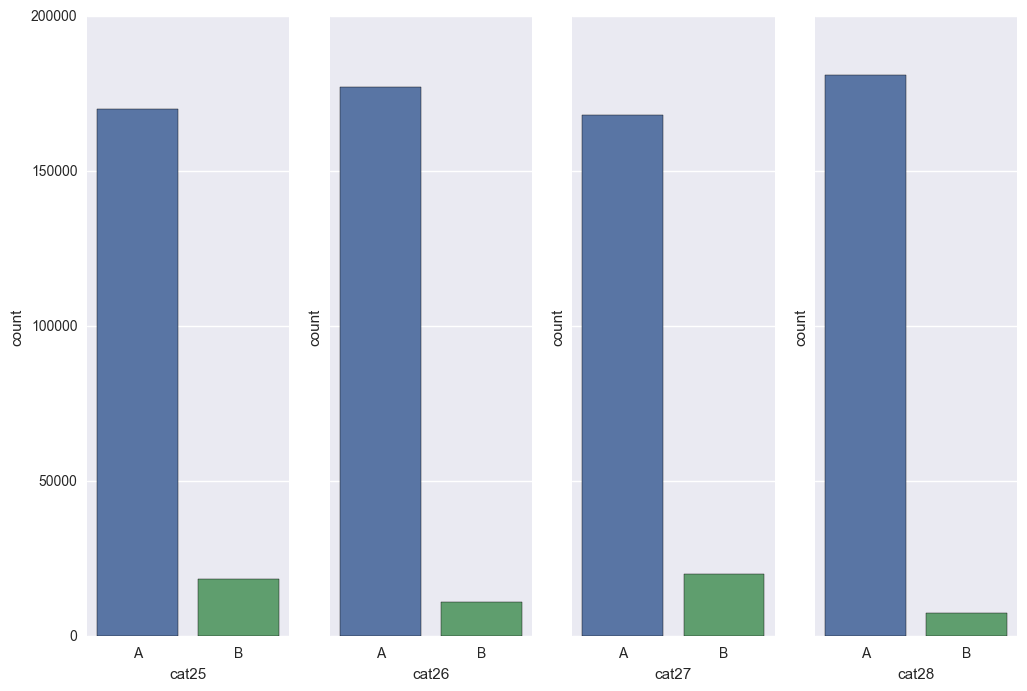

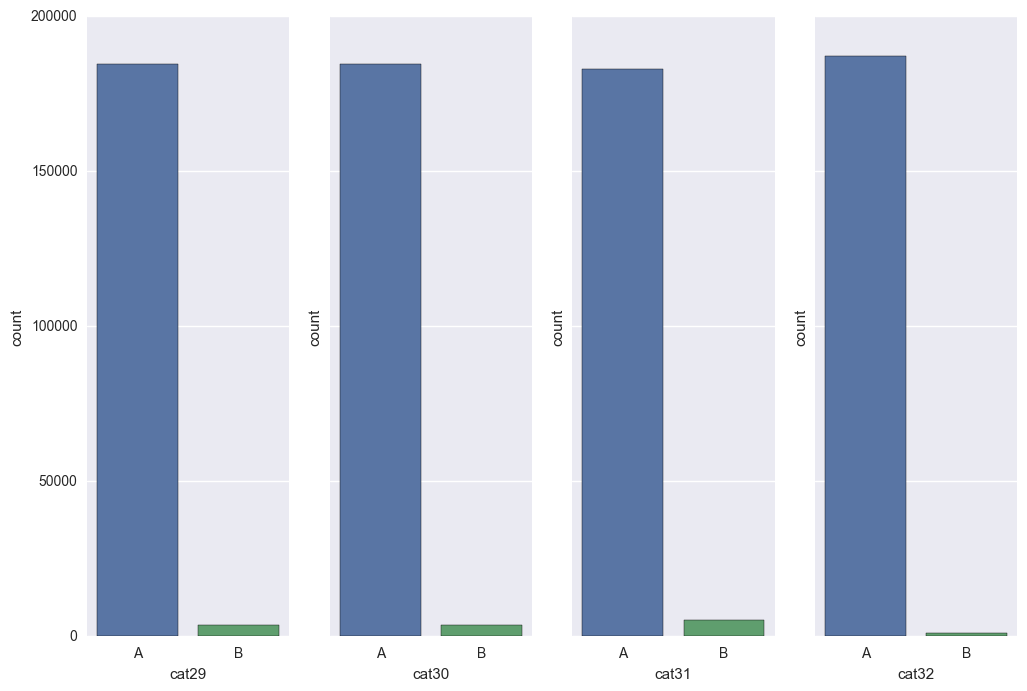

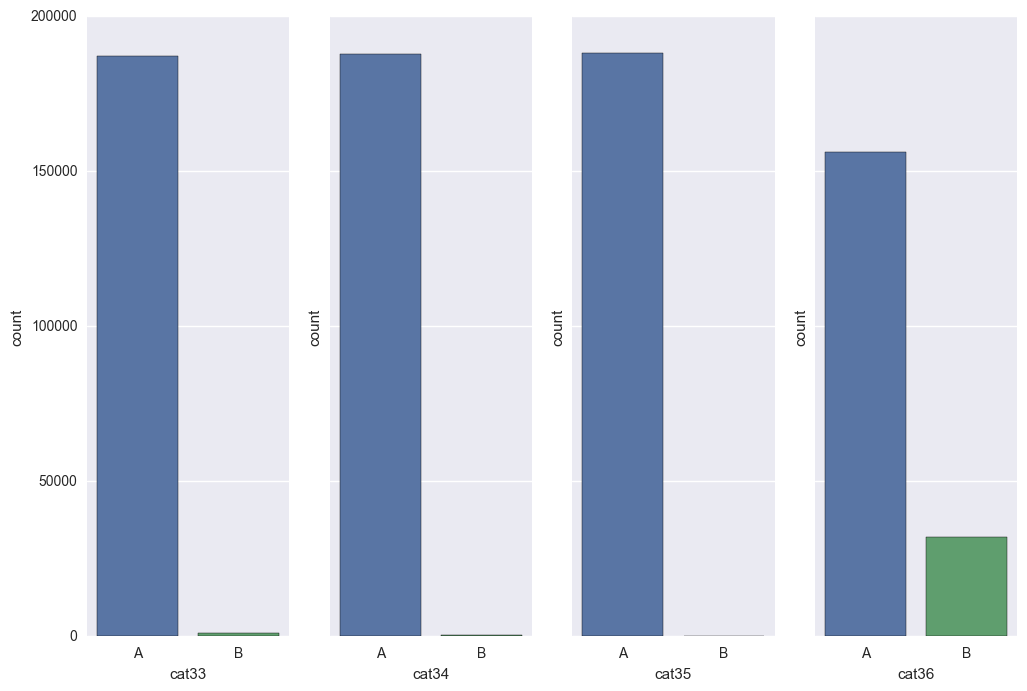

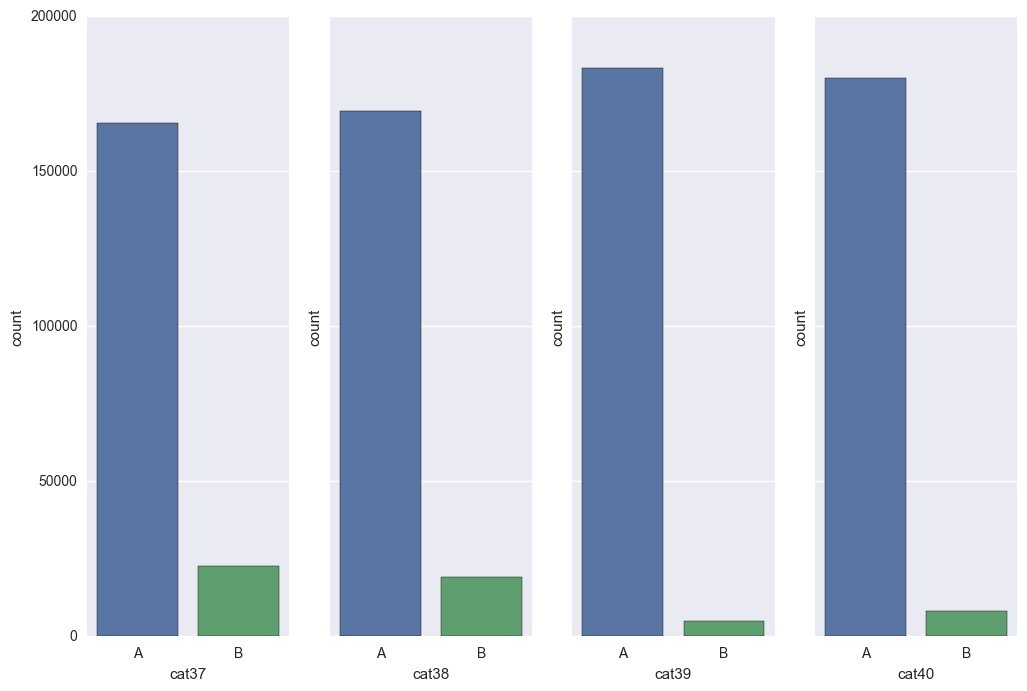

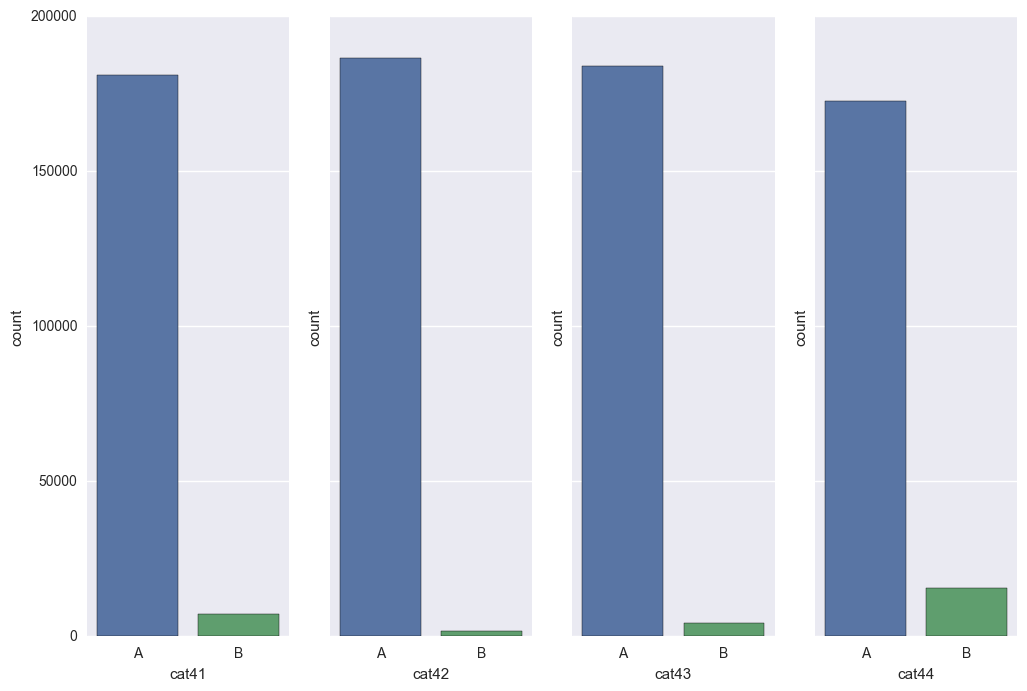

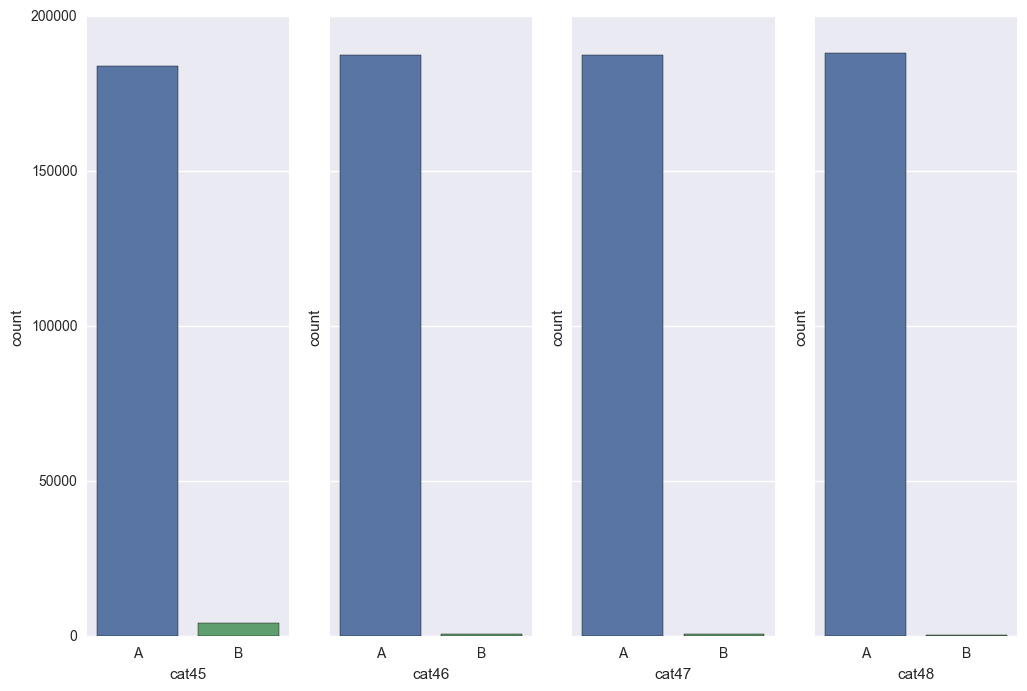

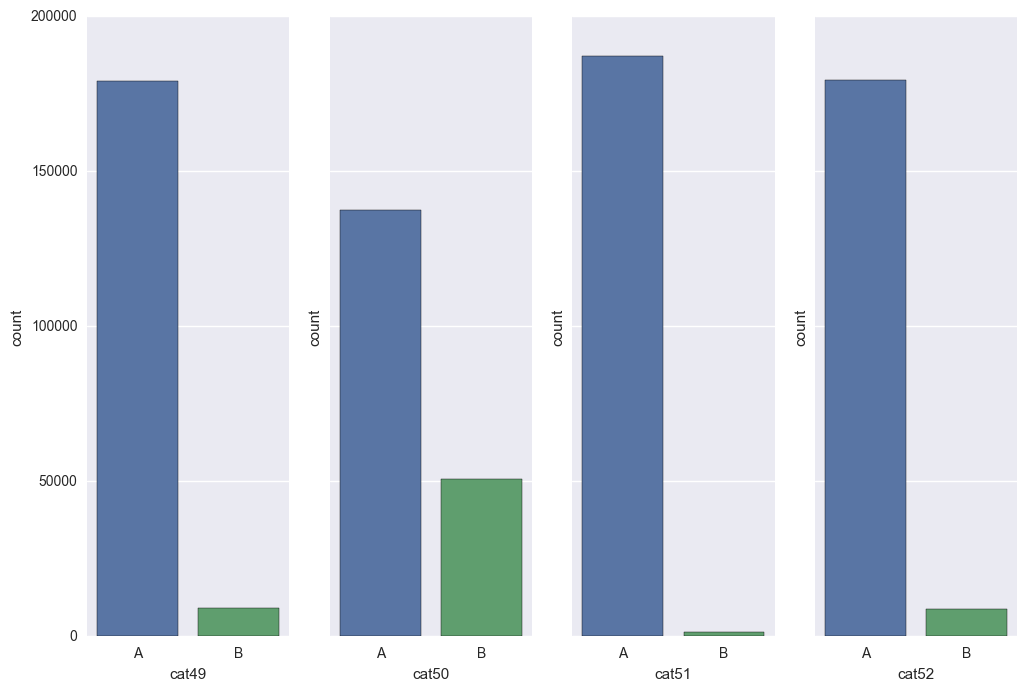

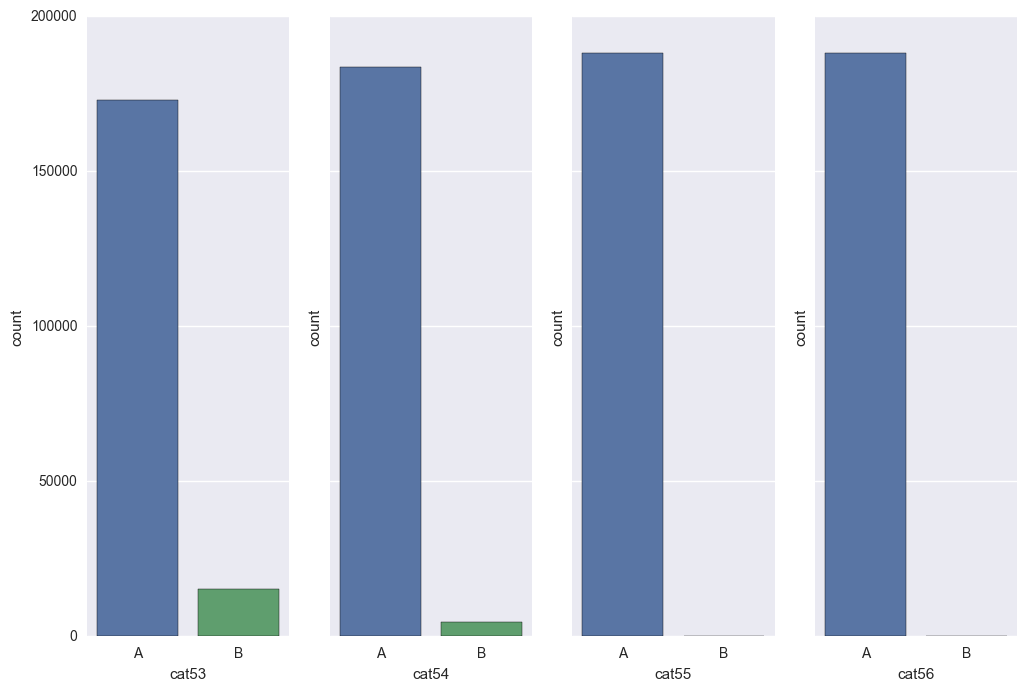

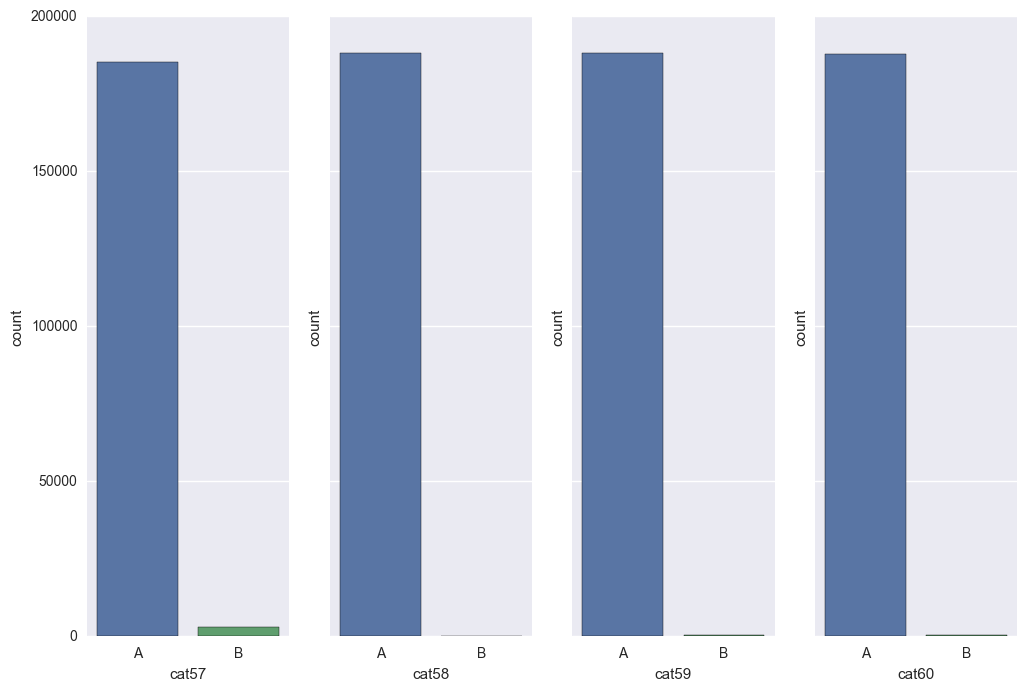

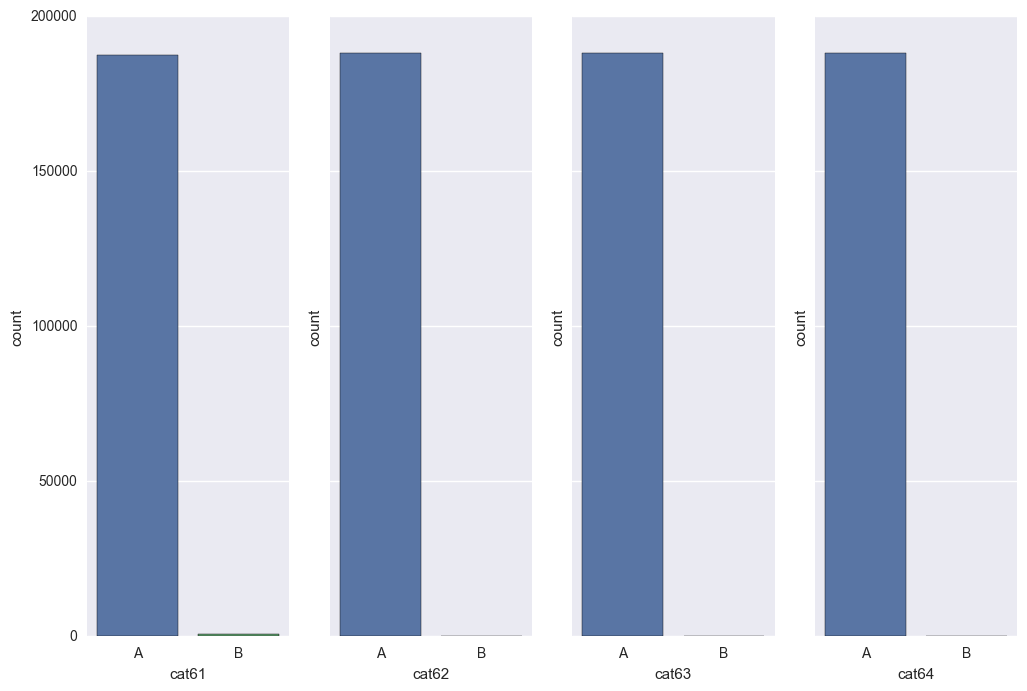

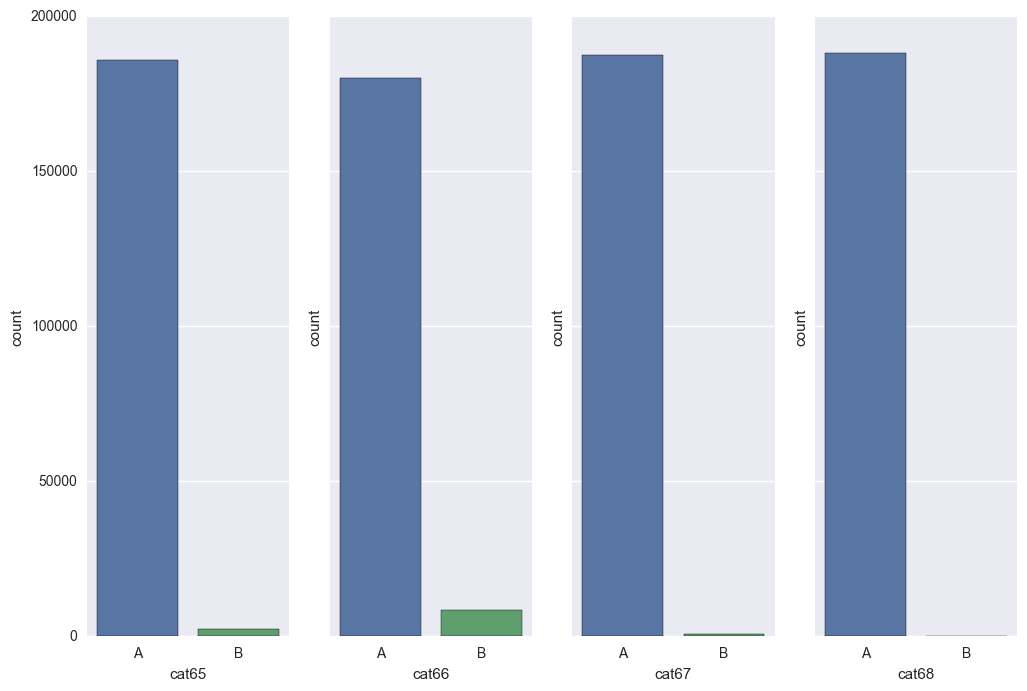

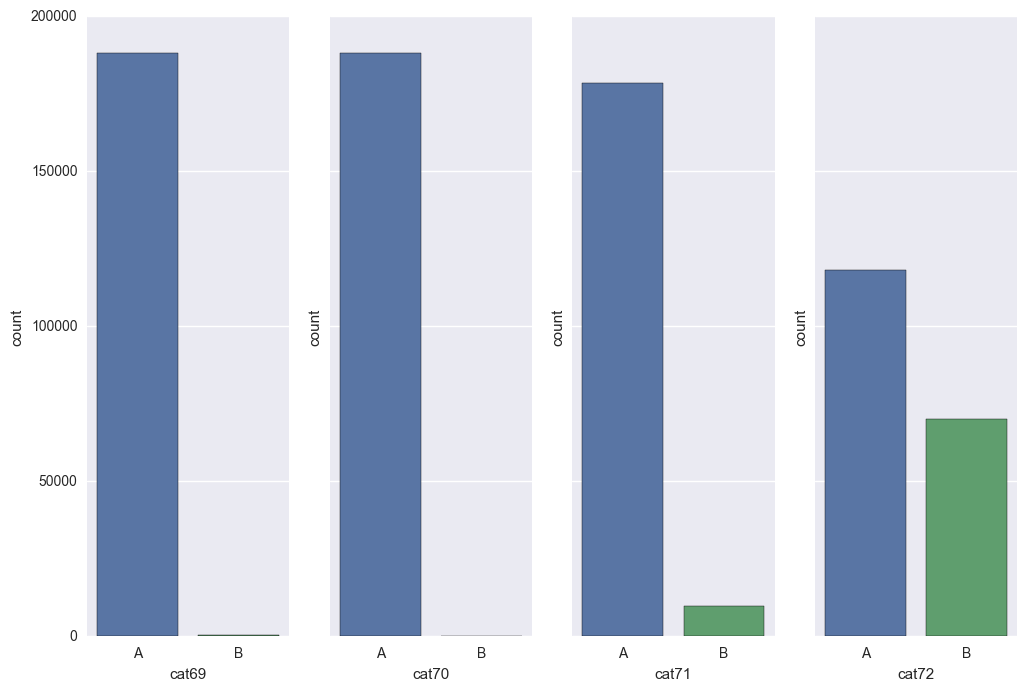

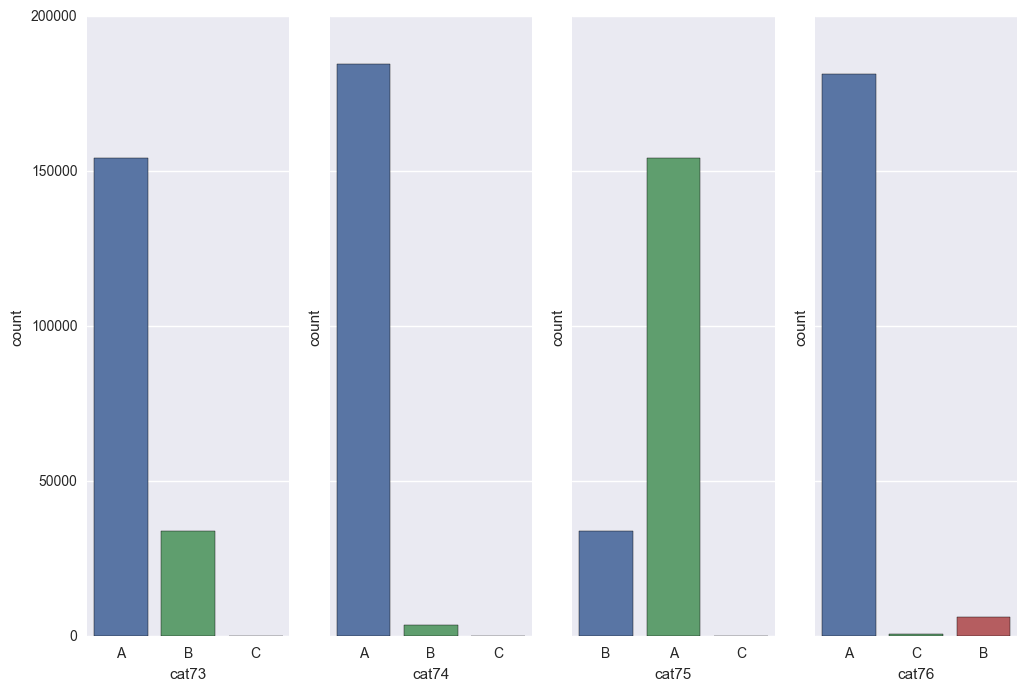

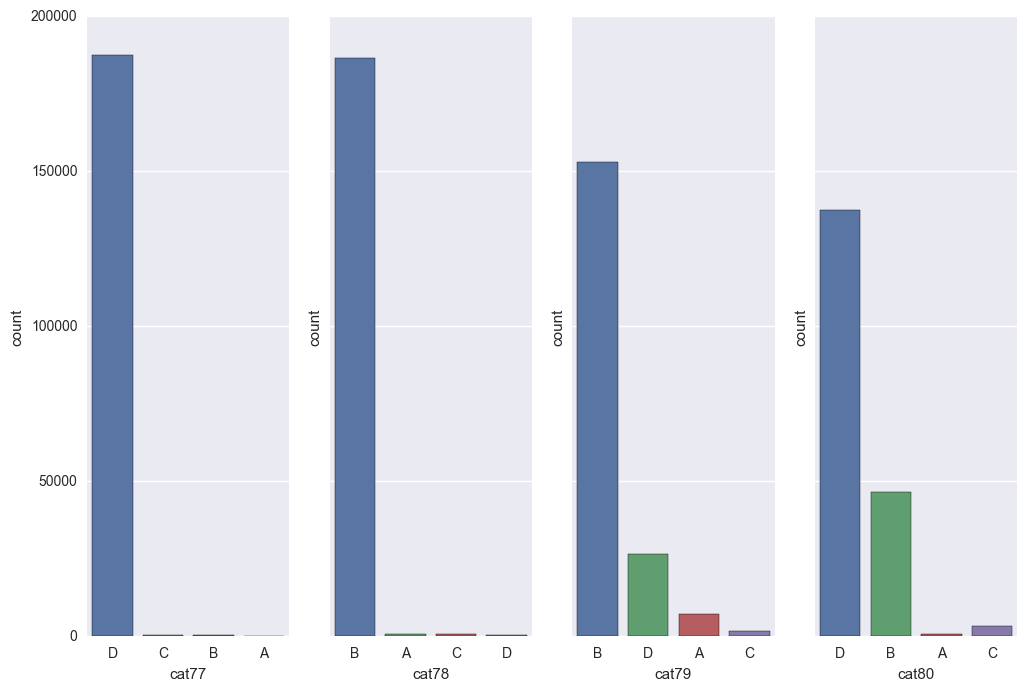

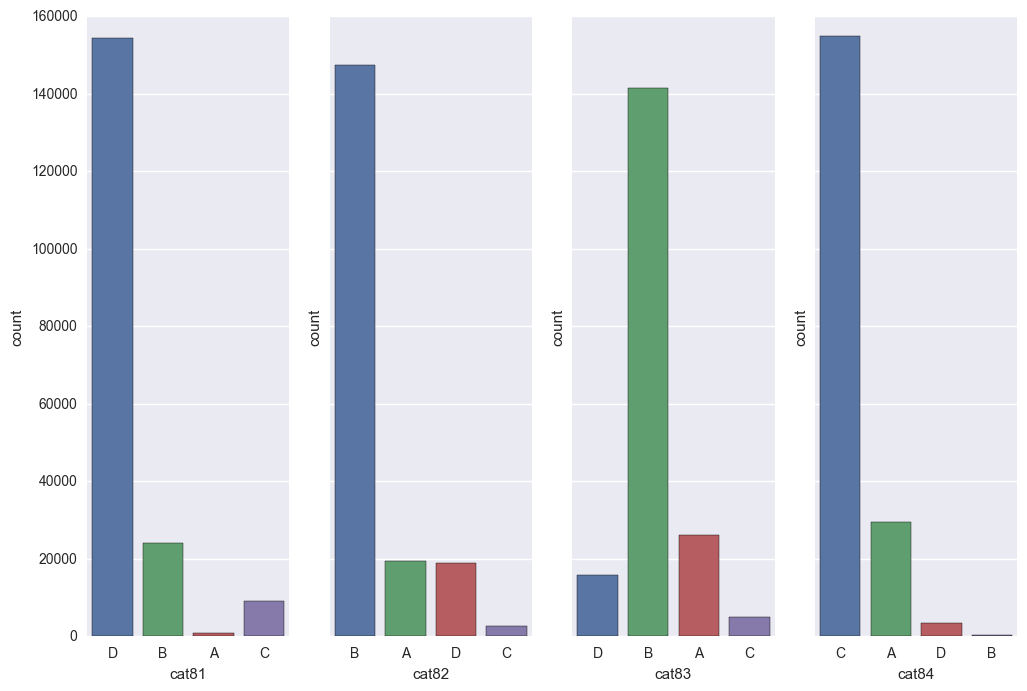

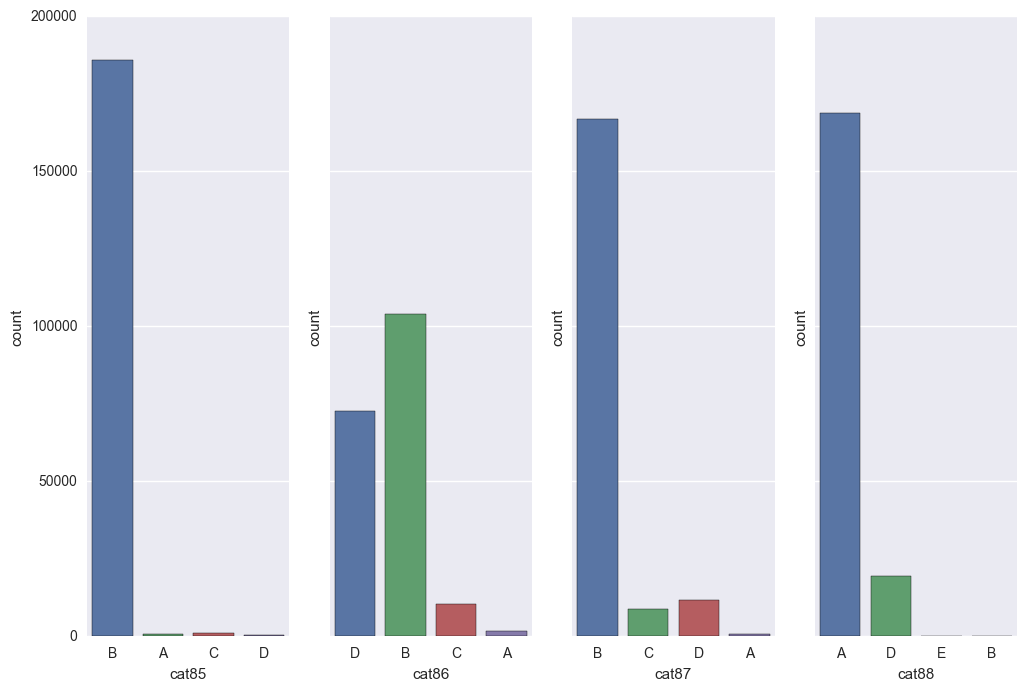

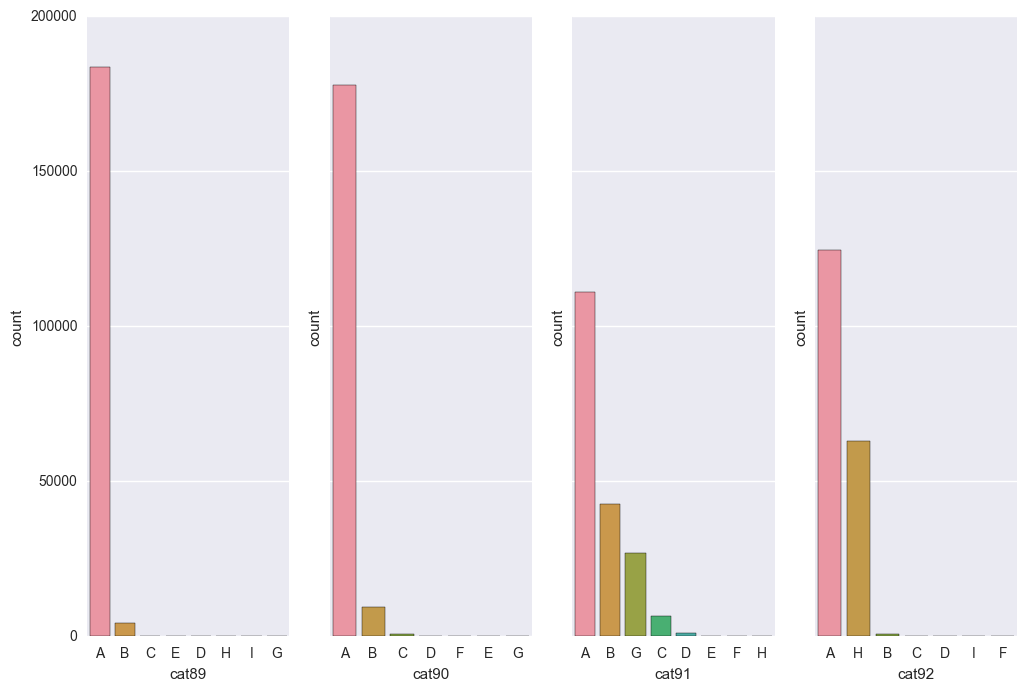

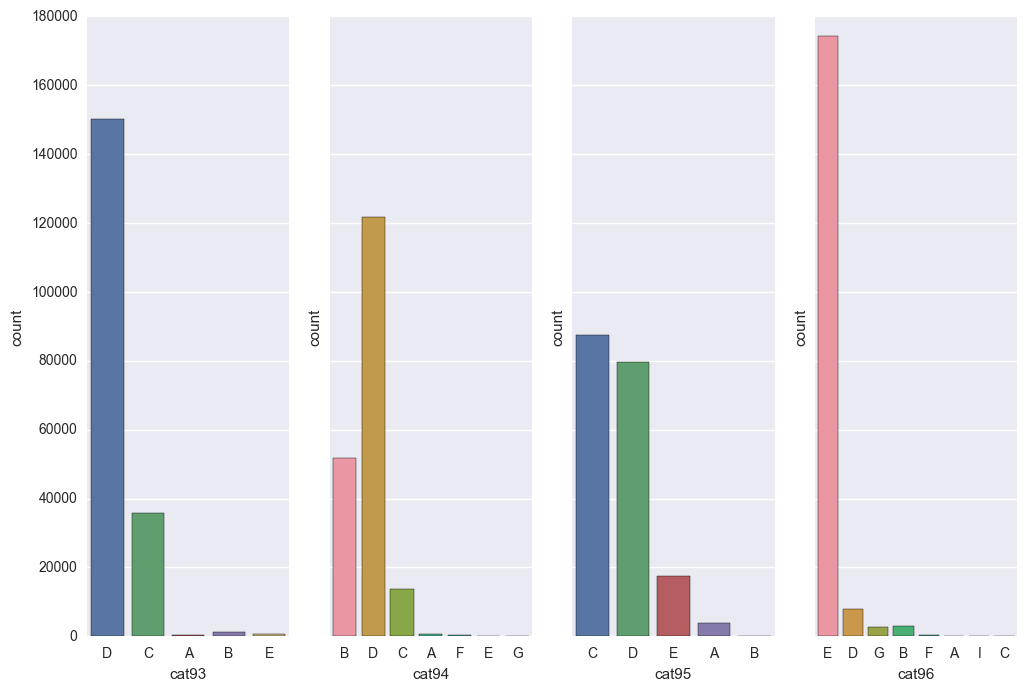

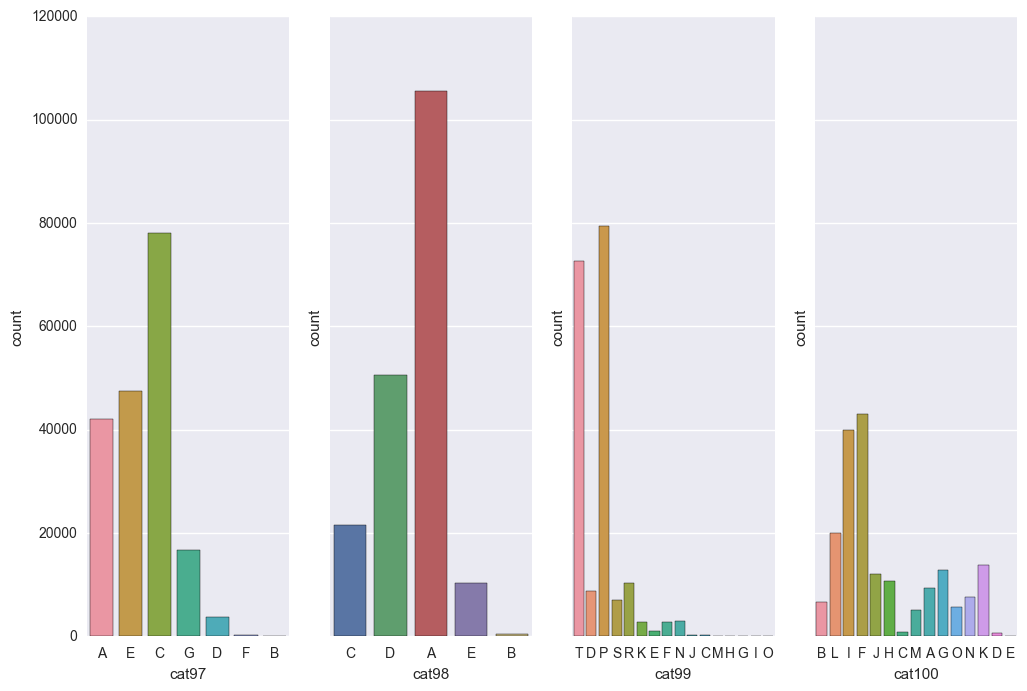

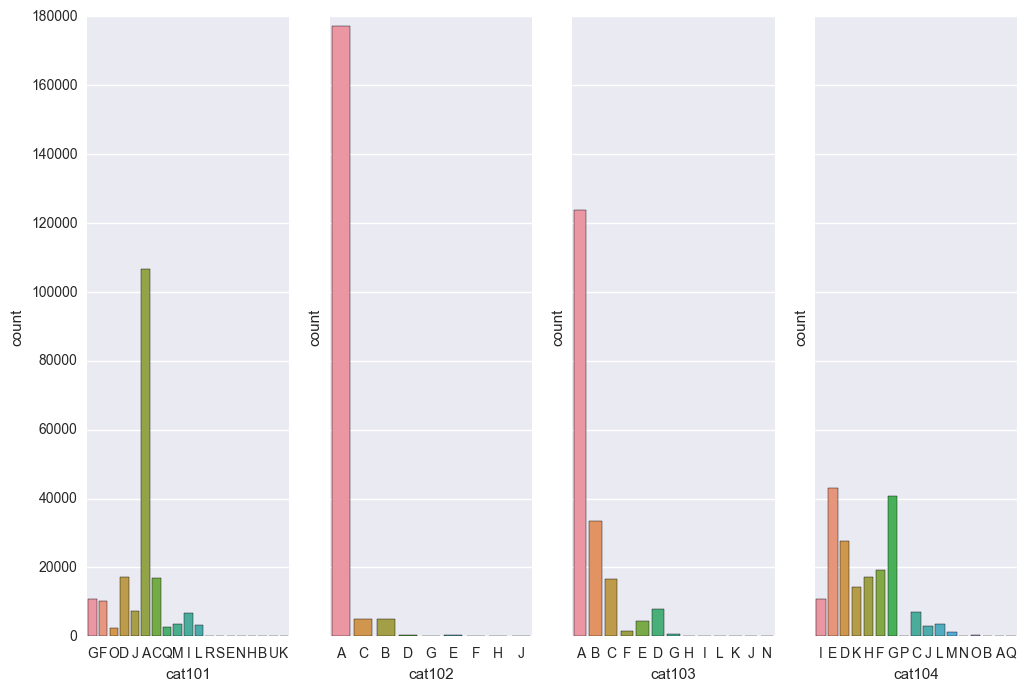

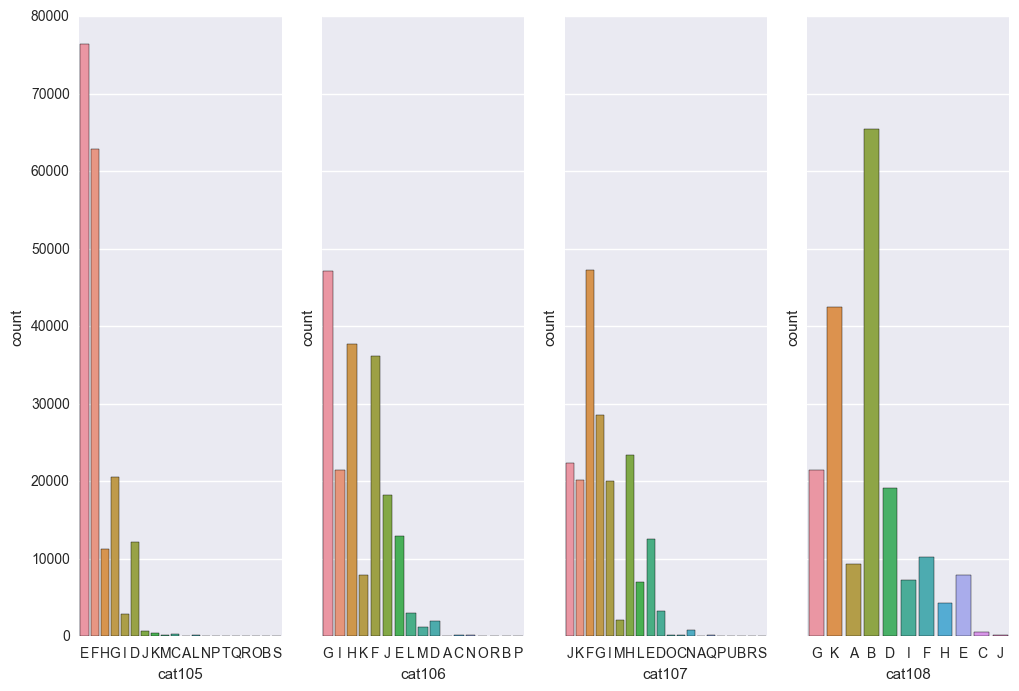

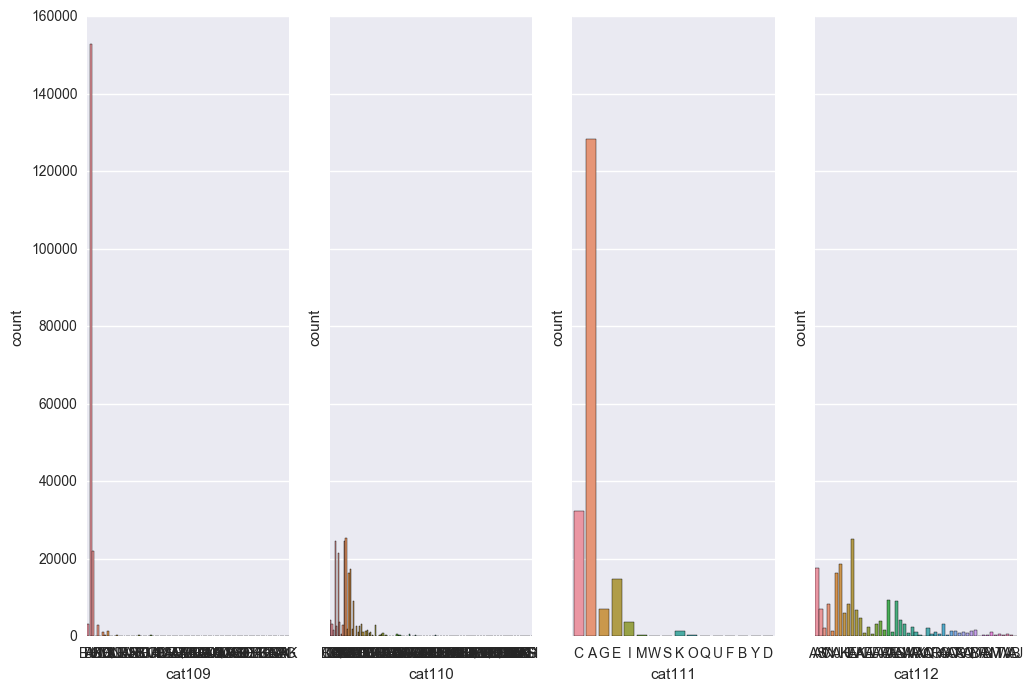

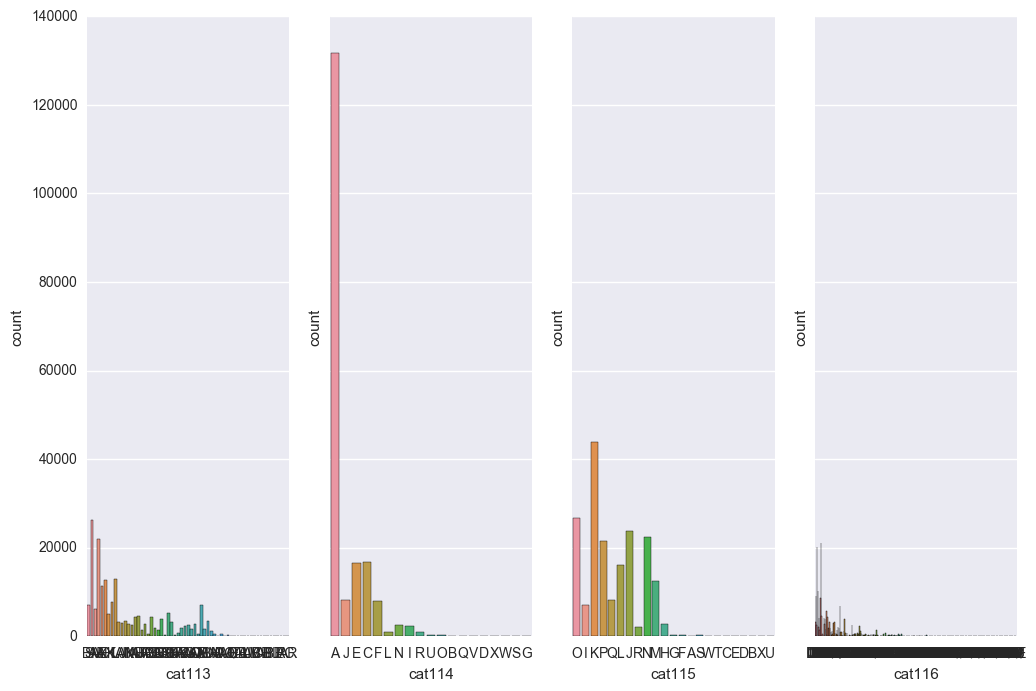

In [107]:
cols = dataset.columns
n_cols = 4
n_rows = 29
for i in range(n_rows): # 29
    fg, ax = plt.subplots(nrows=1,ncols=n_cols, sharey=True, figsize=(12, 8)) # 1 row, 4 columns
    for j in range(n_cols): # 4
        sns.countplot(x=cols[i*n_cols+j], data=dataset, ax=ax[j]) #x=cols[0-117], ax=ax[1-4]

## Data Preparation

In [149]:
import pandas

labels = []

for i in range(0, split):
    train = dataset[cols[i]].unique()
    test = dataset_test[cols[i]].unique()
    labels.append(list(set(train) | set(test)))
    
del dataset_test

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cats = []
for i in range(0, split):
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(dataset.iloc[:,i])
    feature = feature.reshape(dataset.shape[0], 1)
    
    onehot_encoder = OneHotEncoder(sparse=False, n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)
    
encoded_cats = numpy.column_stack(cats)

print(encoded_cats.shape)

dataset_encoded = numpy.concatenate((encoded_cats, dataset.iloc[:,split:].values),axis=1)
del cats
del feature
del dataset
del encoded_cats
print(dataset_encoded.shape)

In [159]:
x = LabelEncoder()
x.fit(labels[5])
peep = x.transform(dataset.iloc[:,5])
peep = peep.reshape(dataset.shape[0], 1)

In [165]:
boo = []
oneho = OneHotEncoder(sparse=False, n_values=len(labels[5]))
peep = oneho.fit_transform(peep)
boo.append(peep)

In [169]:
boo

[array([[ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        ..., 
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.]])]

In [154]:
dataset.head()

cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12 cat13 cat14  \
0    A    B    A    B    A    A    A    A    B     A     B     A     A     A   
1    A    B    A    A    A    A    A    A    B     B     A     A     A     A   
2    A    B    A    A    B    A    A    A    B     B     B     B     B     A   
3    B    B    A    B    A    A    A    A    B     A     A     A     A     A   
4    A    B    A    B    A    A    A    A    B     B     A     B     A     A   

  cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23 cat24 cat25 cat26  \
0     A     A     A     A     A     A     A     A     B     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     B     A     A     A   
4     A     A     A     A     A     A     A     A     B     A     A     A   

  cat27 cat28 cat29 cat30 cat31 cat32 cat33 cat34 cat35 cat36 cat37 cat38  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     B     A     A   
3     A     A     A     A     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat39 cat40 cat41 cat42 cat43 cat44 cat45 cat46 cat47 cat48 cat49 cat50  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat51 cat52 cat53 cat54 cat55 cat56 cat57 cat58 cat59 cat60 cat61 cat62  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat63 cat64 cat65 cat66 cat67 cat68 cat69 cat70 cat71 cat72 cat73 cat74  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     A     B     A   
4     A     A     A     A     A     A     A     A     A     B     A     A   

  cat75 cat76 cat77 cat78 cat79 cat80 cat81 cat82 cat83 cat84 cat85 cat86  \
0     B     A     D     B     B     D     D     B     D     C     B     D   
1     A     A     D     B     B     D     D     A     B     C     B     D   
2     A     A     D     B     B     B     D     B     D     C     B     B   
3     A     A     D     B     B     D     D     D     B     C     B     D   
4     A     A     D     B     D     B     D     B     B     C     B     B   

  cat87 cat88 cat89 cat90 cat91 cat92 cat93 cat94 cat95 cat96 cat97 cat98  \
0     B     A     A     A     A     A     D     B     C     E     A     C   
1     B     A     A     A     A     A     D     D     C     E     E     D   
2     B     A     A     A     A     A     D     D     C     E     E     A   
3     B     A     A     A     A     A     D     D     C     E     E     D   
4     C     A     A     A     B     H     D     B     D     E     E     A   

  cat99 cat100 cat101 cat102 cat103 cat104 cat105 cat106 cat107 cat108 cat109  \
0     T      B      G      A      A      I      E      G      J      G     BU   
1     T      L      F      A      A      E      E      I      K      K     BI   
2     D      L      O      A      B  